### <font color='steelblue'>Dervla Scully 18329511</font>

In [182]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# matplotlib imports
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB   
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_roc_curve

import category_encoders as ce #  pip install category-encoders
from graphviz import Source 

# mlxtend imports
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

<h1 align="center"><font color='steelblue'>COMP47490 Machine Learning - Assignment 1</font></h1>  

### <font color='steelblue'>1. Build and Evaluate Animal Shelter Death Risk Prediction Model</font>

This assignment focuses on building and evaluating prediction models for a particular problem and dataset. The problem and data come from an animal shelter concerned with animal welfare and reducing the risk of animal death. 

The shelter wants to use the data collected about their animals to __build a data analytics solution for death risk prediction to help them in their planning towards improving the welfare of the animals they shelter__. 

The shelter collects some data for each animal they take in (columns in the dataset with keyword "intake") and also records the status of each animal when it left the shelter (columns in the dataset with keyword "outcome"). __The target variable to predict is a variable called outcome. For this variable, the value “1” indicates that after intake, the animal outcome was negative, e.g., "death", while the value "0" indicates that the animal outcome was a positive one, e.g., was adopted or returned to the owner__. 

The dataset we work with is a sample of the data released by this shelter: https://data.austintexas.gov/ Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

__The goal in this assignment is to work with the data to build and evaluate prediction models that capture the relationship between the descriptive features and the target feature outcome.__

#### <font color='steelblue'>Plan</font>

Clean the data:
- Convert features to appropriate datatypes
- Drop duplicate/constant columns/rows
- Check for and handle null values
- Check logical integrity of data
- Compile report of issues and solutions
- Apply solutions

Encoding and Normalisation:
- Encode and normalise each feature appropriately

Split Data:
- Split into Train and Test Data

Feature Selection:
- Feature Selection using Filter techniques on training data
- Feature Selection using Wrapper techniques on training data
- Choose the best feature subset for each classifier

Evaluation:
- Decide on evaluation measures
- Tune each parameter using training data
- Test each parameter using test data

ROC AUC
- Plot ROC curves and calculate AUC values

Compare
- Compare and decide on the best classifier for the task

### <font color='steelblue'>Load data</font>

In [183]:
# read in data from csv file to pandas dataframe.  
df = pd.read_csv('data/animal_shelter_18329511.csv',  keep_default_na=True, delimiter=',', skipinitialspace=True)
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Outcome
0,A756302,Connie,08/19/2017 10:05:00 AM,08/19/2017 10:05:00 AM,06/12/2017,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Tortie,0
1,A804491,Bruno,09/24/2019 12:12:00 PM,09/24/2019 12:12:00 PM,09/15/2008,Dog,Neutered Male,11 years,German Shepherd,Brown/Black,0
2,A761742,NaN,11/17/2017 06:59:00 PM,11/17/2017 06:59:00 PM,07/08/2017,Cat,Neutered Male,4 months,American Shorthair Mix,White/Black,0
3,A674348,NaN,03/13/2014 02:21:00 PM,03/13/2014 02:21:00 PM,09/11/2013,Cat,Intact Female,6 months,Domestic Shorthair Mix,Calico,0
4,A784039,NaN,11/16/2018 11:58:00 AM,11/16/2018 11:58:00 AM,11/10/2016,Cat,Spayed Female,2 years,Domestic Shorthair Mix,Brown Tabby,0


In [184]:
# Number of rows and columns
df.shape

(5000, 11)

In [185]:
# Column names
list(df.columns)

['Animal ID',
 'Name',
 'DateTime',
 'MonthYear',
 'Date of Birth',
 'Animal Type',
 'Sex upon Outcome',
 'Age upon Outcome',
 'Breed',
 'Color',
 'Outcome']

### <font color='steelblue'>Convert features to appropriate datatypes</font>

To clean my data I will start by converting each of the features to the appropriate datatypes. Currently each is of type 'object':

In [186]:
# Data types of each feature
df.dtypes

Animal ID           object
Name                object
DateTime            object
MonthYear           object
Date of Birth       object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
Outcome              int64
dtype: object

The features __Animal Type, Sex upon Outcome, Breed, Color, Outcome__ are __categorical__.

We can examine these more closely:

In [187]:
# Print unique animal types
df["Animal Type"].unique()

array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

In [188]:
# Print unique sex upon outcome
df["Sex upon Outcome"].unique()

array(['Spayed Female', 'Neutered Male', 'Intact Female', 'Unknown',
       'Intact Male'], dtype=object)

In [189]:
# Print the first 10 Breeds
print(df["Breed"].unique()[:10])

# print the number of unique breeds are there is a large number of them
len(df["Breed"].unique())

['Domestic Shorthair Mix' 'German Shepherd' 'American Shorthair Mix'
 'Black/Tan Hound' 'American Staffordshire Terrier Mix' 'Bat' 'Rat Mix'
 'Siberian Husky Mix' 'Labrador Retriever Mix' 'Snowshoe Mix']


565

In [190]:
# Print the first 10 colours
print(df["Color"].unique()[:10])

# Print the number of unique colors as there is a large number of them
len(df["Color"].unique())

['Tortie' 'Brown/Black' 'White/Black' 'Calico' 'Brown Tabby' 'Black'
 'Gray Tabby' 'Black/Brown' 'Blue/White' 'Brown']


220

In [191]:
# Print unique outcomes - we expect this to be 0 and 1 based on the description but we can double check this
df["Outcome"].unique()

array([0, 1])

Based on examining the data, I can conclude that the features Animal Type, Sex upon Outcome, Breed, Color, Outcome are categorical.

I will convert these to type 'category':

In [192]:
# Select columns containing categorical data
categorical_columns = df[['Animal Type','Sex upon Outcome','Breed', 'Color', 'Outcome']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  

In [193]:
df.dtypes

Animal ID             object
Name                  object
DateTime              object
MonthYear             object
Date of Birth         object
Animal Type         category
Sex upon Outcome    category
Age upon Outcome      object
Breed               category
Color               category
Outcome             category
dtype: object

Next I will consider the features which have some sort of date or time element - DateTime, MonthYear and Date of Birth:

In [194]:
df[["DateTime", "MonthYear", "Date of Birth"]].head()

,DateTime,MonthYear,Date of Birth
0,08/19/2017 10:05:00 AM,08/19/2017 10:05:00 AM,06/12/2017
1,09/24/2019 12:12:00 PM,09/24/2019 12:12:00 PM,09/15/2008
2,11/17/2017 06:59:00 PM,11/17/2017 06:59:00 PM,07/08/2017
3,03/13/2014 02:21:00 PM,03/13/2014 02:21:00 PM,09/11/2013
4,11/16/2018 11:58:00 AM,11/16/2018 11:58:00 AM,11/10/2016


We have __DateTime__ which is the date and time that the animal was brought into the shelter. 

We also have __MonthYear__, which presumably is supposed to be just the month and year that the animal was brought into the shelter (this is the case for the full dataset which is linked in the assignment outline) but in my data this is just a copy of the date and time, the same as DateTime.

__Date of Birth__ is the date of birth of the animal.

Each of these features will need some preprocessing to make them useful for our model. Before I do this I will simply __convert DateTime, MonthYear and Date of Brith to types datetime__. To convert these strings into internal datetimes, we can use the pandas function to_datetime:

In [195]:
# Select columns containing datetime data
datetime_columns = df[['DateTime','MonthYear','Date of Birth']].columns

# Convert data type to datetime for these columns
for column in datetime_columns:
    df[column]=pd.to_datetime(df[column])

In [196]:
df.dtypes

Animal ID                   object
Name                        object
DateTime            datetime64[ns]
MonthYear           datetime64[ns]
Date of Birth       datetime64[ns]
Animal Type               category
Sex upon Outcome          category
Age upon Outcome            object
Breed                     category
Color                     category
Outcome                   category
dtype: object

Finally we have __Animal ID, Name and Age upon Outcome__. 

Animal ID is a unique identifier for each animal.

Name is the name of each animal.

Age upon outcome is the age of the animal when they left the shelter. This is currently a string of "x months" or "x years".

For now I will keep each of these as type Object.

### <font color='steelblue'>Drop duplicate columns:</font>

From examining the data, the only columns which might be duplicated are DateTime and MonthYear. We can check this:

In [197]:
# Check if Datetime == MonthYear
# Check if two series are equal using series1.equals(series2)
df["DateTime"].equals(df["MonthYear"])

True

Thus the features DateTime and MonthYear are the same so we can drop one of these. I will drop MonthYear:

In [198]:
df.drop(labels=["MonthYear"], inplace=True, axis=1)
df.head(3)

,Animal ID,Name,DateTime,Date of Birth,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Outcome
0,A756302,Connie,2017-08-19 10:05:00,2017-06-12,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Tortie,0
1,A804491,Bruno,2019-09-24 12:12:00,2008-09-15,Dog,Neutered Male,11 years,German Shepherd,Brown/Black,0
2,A761742,NaN,2017-11-17 18:59:00,2017-07-08,Cat,Neutered Male,4 months,American Shorthair Mix,White/Black,0


### <font color='steelblue'>Drop duplicate rows:</font>

We can check if there are any duplicated rows using df.duplicated(). This returns a series containing values True or False for each row, True indicating the row is duplicated, False otherwise. We can get the value counts, and the count for True will indicate the number of duplicate rows:

In [199]:
df.duplicated().value_counts()

False    5000
dtype: int64

There are no duplicated rows.
We know this as the value count for False is 5000, the number of rows. And there are no rows with the value True.

### <font color='steelblue'>Drop constant columns:</font>

A constant column is a column with only 1 unique value. We can check the number of unique values for each column using the function nunique():

In [200]:
df.nunique()

Animal ID           4976
Name                2391
DateTime            4937
Date of Birth       2903
Animal Type            5
Sex upon Outcome       5
Age upon Outcome      43
Breed                565
Color                220
Outcome                2
dtype: int64

In [201]:
# Check which columns have no. unique values equal to 1
df.nunique()[df.nunique()==1]

Series([], dtype: int64)

We can see that there are no columns with only 1 unique value. Thus there are no constant columns.

### <font color='steelblue'>Check for Null values:</font>

Next I will count the number of null values for each feature:

In [202]:
df.isnull().sum()

Animal ID              0
Name                1563
DateTime               0
Date of Birth          0
Animal Type            0
Sex upon Outcome       0
Age upon Outcome       2
Breed                  0
Color                  0
Outcome                0
dtype: int64

There are 2 null values for Age upon Outcome. Age upon Outcome might be a useful feature when it comes to developing our model, and the rows with null values make up 0.04% of the rows so I will drop these rows.

There are 1563 null values for Name. For now I will just convert the null values to "Unknown" for the Name column to make the data more interpretable. I will discuss this feature in more detial later.

In [203]:
# Extract just the rows with Age upon Outcome not null
df = df[df['Age upon Outcome'].notna()]

In [204]:
# Replace null values for Name with 'Unknown'
df["Name"]=df["Name"].fillna("Unknown")

In [205]:
df.head()

,Animal ID,Name,DateTime,Date of Birth,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Outcome
0,A756302,Connie,2017-08-19 10:05:00,2017-06-12,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Tortie,0
1,A804491,Bruno,2019-09-24 12:12:00,2008-09-15,Dog,Neutered Male,11 years,German Shepherd,Brown/Black,0
2,A761742,Unknown,2017-11-17 18:59:00,2017-07-08,Cat,Neutered Male,4 months,American Shorthair Mix,White/Black,0
3,A674348,Unknown,2014-03-13 14:21:00,2013-09-11,Cat,Intact Female,6 months,Domestic Shorthair Mix,Calico,0
4,A784039,Unknown,2018-11-16 11:58:00,2016-11-10,Cat,Spayed Female,2 years,Domestic Shorthair Mix,Brown Tabby,0


### <font color='steelblue'>Check logical integrity of data</font>

Next I will check that the values for each feature make sense in the context.

I will check the years for __DateTime__. I am only checking the years, as the month, day, time etc. must already make sense or we would have received an error when converting to datetime. For example, if we had a month of 13, which is obviously invalid. Thus I will only check the years.

In [206]:
# Extract the year from DateTime feature using dt.year
# Get the unique years
# Sort the years
np.sort(df["DateTime"].dt.year.unique())

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

The years that animals were dropped into the shelter in our data range from 2013-2021. This makes sense.

Next I will check the years for __Date of Birth__:

In [207]:
# Extract the year from Date of Birth feature using dt.year
# Get the unique years
# Sort the years
np.sort(df["Date of Birth"].dt.year.unique())

array([1994, 1995, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021])

The years for date of birth range from 1994 to 2021. To check if these make sense it depends on when these animals came into the shelter. The best way to do this would be to work out the age that the animals came into the shelter at and check if this makes sense.

I will get the age using DateTime - Date of Birth.

I will convert this to years. Each value of the series df["DateTime"]-df["Date of Birth"] will be of type Timedelta which we cannot extract year from, but we can extract days, so I will convert to days, divide by 365, and round to the nearest whole number to give the approx age in years that each animal came into the shelter.

I will then sort these in descending order.

I will print the ages, animal types and breeds of the 15 oldest:

In [208]:
ages=round((df["DateTime"]-df["Date of Birth"]).dt.days / 365)

for index, value in ages.sort_values(ascending=False).head(15).items():
    print(value, df.loc[index]["Animal Type"], df.loc[index]["Breed"])

21.0 Cat Domestic Shorthair Mix
18.0 Cat Domestic Medium Hair Mix
18.0 Cat Domestic Shorthair Mix
18.0 Cat Domestic Shorthair
17.0 Cat Domestic Shorthair Mix
17.0 Cat Siamese Mix
17.0 Dog Norwich Terrier
16.0 Cat Domestic Shorthair Mix
16.0 Cat Domestic Shorthair Mix
16.0 Dog Cocker Spaniel Mix
16.0 Cat Domestic Longhair
16.0 Dog Pit Bull Mix
16.0 Dog Miniature Poodle Mix
15.0 Cat Domestic Shorthair Mix
15.0 Cat Domestic Shorthair Mix


The oldest animal is a 21 year old cat, followed by three 18 year old cats, 2 17 year old cats, and a 17 year old dog.

I researched the typical ages of these breeds of dogs and cats.

According to this article: https://www.hepper.com/how-long-do-domestic-shorthair-cats-live/, "It’s not unusual for Domestic Shorthair cats to live for 20 years."

According to this article: https://www.aspcapetinsurance.com/resources/domestic-medium-hair/, "Domestic Medium Hair cat lifespan can be lengthy—on average, 15 to 18 years"

According to this article: https://www.google.com/search?q=Norwich+Terrier+max+age&sxsrf=AOaemvLLNn9DPJoOU-mj9scGHveKNXS8-A%3A1635166061574&ei=bad2YY6wIun97_UPlre16Ak&ved=0ahUKEwjOmv6hzOXzAhXp_rsIHZZbDZ0Q4dUDCA4&uact=5&oq=Norwich+Terrier+max+age&gs_lcp=Cgdnd3Mtd2l6EAM6BwgAEEcQsANKBAhBGABQ0V1YrGBg52FoAXACeACAAWmIAecCkgEDMy4xmAEAoAEByAEIwAEB&sclient=gws-wiz ,
"The average life expectancy of Norwich terrier is equal to that of the other dog breeds, which ranges from a minimum of 10 to a maximum of 16 years."

The oldest ages of cats in the dataset arent unusual. The oldest dogs are above average but not hugely so.

Therefore, I will conclude that these values make sense in the context.

Next I will check that the values for __Age upon Outcome__ make sense.

Age upon outcome gives the age of the animals. This is given by a number of different measures - months, weeks, years, days. I will later transform these values so that they all have the same measure but for now we will check that the values make sense.

I will print the unique values for each measure, sort these in ascending order, and check that these make sense.

In [209]:
# Count keeps track of the number of values that we check. 
# I will check that this is equal to the number of unique values 
# at the end to be sure we have not missed any values.
count=0

# List of the different measures used
measures=["months", "weeks", "years", "days"]

# Loop through each measure
for measure in measures:
    
    # Empty list for the unique values for the current measure
    l=[]
    
    # Loop through each unique value
    for age in list(df["Age upon Outcome"].unique()):
        
        # Check that the current value contains the current measure
        # For example, if the measure is "weeks" and the value is "11 weeks" this would be true
       
        # measures are plural, but if the value is 1 the measure will 
        # be singluar so also check for measure[:-1] - removing the plural 's'
        # For example, "11 weeks" (plural) vs "1 week" (singular)
        
        if measure in age or measure[:-1] in age:
            # increase the count
            count += 1
            
            # add just the number to the list for the current measure - convert to int
            # For example, "11 weeks" would add the integer 11 to the list
            l.append(int(age.split()[0]))

    # print the name of the measure and the sorted list for that measure
    print(measure, sorted(l), "\n")
    
# check that we have not missed any values or counted any more than once
print(count==len(df["Age upon Outcome"].unique()))

months [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 

weeks [1, 1, 2, 3, 4, 5] 

years [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20] 

days [1, 2, 3, 4, 5, 6] 

True


By examining these values we can see that these make sense in the context.

The only value here that is not very useful is the "0 years". It is possible that this was entered because the age was unknown, as if the animal was less than 1 year old the age could have been entered more accurately in days/weeks/months. We can check how many rows have this value:

In [210]:
df[df["Age upon Outcome"]=="0 years"]

,Animal ID,Name,DateTime,Date of Birth,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Outcome
617,A706929,Unknown,2015-07-05 14:46:00,2015-07-06,Cat,Unknown,0 years,Domestic Shorthair Mix,Tortie,0
2104,A749508,Unknown,2017-05-15 19:17:00,2017-05-15,Cat,Unknown,0 years,Domestic Shorthair Mix,Blue,0
2122,A745085,Keira,2017-03-13 18:11:00,2017-10-11,Dog,Spayed Female,0 years,Australian Cattle Dog Mix,White,0
3646,A794190,Unknown,2019-05-04 17:41:00,2019-05-04,Dog,Unknown,0 years,Pit Bull Mix,White/Brown,0
3948,A707429,Unknown,2015-07-13 09:26:00,2015-07-13,Dog,Unknown,0 years,Rottweiler Mix,Black/Brown,1


There are 5 rows with Age upon Outcome of 0 years. To be safe we can remove thus rows. I will do this after I have identified all issues and compiled a report of issues and proposed solutions.

Next I will check that the values for __Animal Type__ make sense:

In [211]:
list(df["Animal Type"].unique())

['Cat', 'Dog', 'Other', 'Bird', 'Livestock']

These all make sense in the context. Similarly, I will check for __Sex upon Outcome__:

In [212]:
list(df["Sex upon Outcome"].unique())

['Spayed Female', 'Neutered Male', 'Intact Female', 'Unknown', 'Intact Male']

Again, these all make sense. One of these values is "Unknown". We can check how many have value "Unknown":

In [213]:
df[df["Sex upon Outcome"]=="Unknown"].shape[0]

394

390 rows have Sex upon Outcome unknown. If there were only a few rows I might consider removing these rows as this is essentially a null value, but there are a large number of unknowns so it is likely common for the sex to be unknown meaning this should be kept in as it could help the model. For example, sex unknown could be common for stray animals, wherease for pets which are brought in the sex is usually known. There could then be some relationship between these strays with sex unknown and their death risk.

We don't need to check whether Animal ID or Name make sense as these won't affect our model and this wouldnt make sense to do - an animals name could be anything, and the ID is unique to each animal. 

There are a very large number of unique values for __Color__ and __Breed__ as we saw earlier so I won't check each of these.

### <font color='steelblue'>DateTime feature evaluation</font>

We previously converted the feature DateTime to type datetime. DateTime is the date and time that the animal was brought into the shelter.

In [214]:
df["DateTime"].head(5)

0   2017-08-19 10:05:00
1   2019-09-24 12:12:00
2   2017-11-17 18:59:00
3   2014-03-13 14:21:00
4   2018-11-16 11:58:00
Name: DateTime, dtype: datetime64[ns]

Dates and times are rich sources of information that can be used with machine learning models. However, datetime variables require some feature engineering to turn them into useful numerical data.

By converting the DateTime strings into datetimes like we previously did, this exposes all the pandas dt properties.

It alows us to break apart the date and get the year, month, week of year, day of month, hour, minute, second, etc.

It would be useful to split the DateTime into Year, Month, Hour, Day Of Week, and drop the original DateTime. 

This is becuase we are designing a predictive model for future predictions, so the date and time in the future will never be the same as the dates and times in our data as these are in the past. It may however be useful to know the time of year or time of the day that the animal was dropped to the shelter as this may have some effect on the outcome. 

Once again, I will outline this problem and solution in the report at the end of this section.

### <font color='steelblue'>Animal ID feature evaluation</font>

Animal ID should be unique for every animal. We can check this:

In [215]:
# Number of rows in df
print(df.shape[0])

# Number of unique Animal IDs
print(df["Animal ID"].unique().shape[0])

4998
4974


There are 4993 rows in the dataset and 4976 unique Animal IDs. This would suggest that 4993-4969=24 animals were brought to the shelter more than once. We can check this:

In [216]:
df["Animal ID"].value_counts()[df["Animal ID"].value_counts()>1]

A748019    2
A735601    2
A689959    2
A694682    2
A547015    2
A674392    2
A799846    2
A750212    2
A760488    2
A760749    2
A565694    2
A768180    2
A684412    2
A755933    2
A732224    2
A811001    2
A753082    2
A778801    2
A700396    2
A717260    2
A769150    2
A732618    2
A742463    2
A692879    2
Name: Animal ID, dtype: int64

In [217]:
for id in df["Animal ID"].value_counts()[df["Animal ID"].value_counts()>1].index:
    display(df[["Name","Outcome"]][df["Animal ID"]==id])

,Name,Outcome
672,Rambo,0
981,Rambo,0


,Name,Outcome
1064,Olivia,0
2390,Olivia,0


,Name,Outcome
2905,Izzy,0
4185,Izzy,0


,Name,Outcome
142,Dixie,0
4696,Dixie,0


,Name,Outcome
519,Peanut,0
4828,Peanut,0


,Name,Outcome
4751,Shorty,0
4850,Shorty,0


,Name,Outcome
298,*Jody,0
2406,*Jody,0


,Name,Outcome
2008,*Calliope,0
4335,*Calliope,0


,Name,Outcome
1642,Pepper,0
1806,Pepper,0


,Name,Outcome
2931,Drogo,0
3773,Drogo,0


,Name,Outcome
1717,Nutty Buddy,0
4783,Nutty Buddy,0


,Name,Outcome
1440,*Loris,0
3714,*Loris,0


,Name,Outcome
2633,Ben,0
3509,Ben,0


,Name,Outcome
1699,Angel,0
4207,Angel,0


,Name,Outcome
149,Ripley,0
892,Ripley,0


,Name,Outcome
1971,*Ophelia,0
4686,*Ophelia,0


,Name,Outcome
729,Bear,0
3026,Bear,0


,Name,Outcome
1233,Bonnie,0
3671,Bonnie,0


,Name,Outcome
1763,Calseta,0
4863,Calseta,0


,Name,Outcome
969,Lily,0
1553,Lily,0


,Name,Outcome
1542,Gizmo,0
2506,Gizmo,0


,Name,Outcome
1588,*Sidra,0
1666,*Sidra,0


,Name,Outcome
1356,Manchas,0
2223,Manchas,0


,Name,Outcome
2656,Nukeem,0
4067,Nukeem,0


Animal ID as it currently is will not add much to our predictive model and could lead to overfitting, as it is unique to each animal and it is unlikely that many of these animals will be returning to the shelter throughout the future. Thus this does not help our model much. 

We can see from above that all of the animals which were brought back to the shelter a second time all had an outcome of 0. One could hypothesise that the number of times an animal is brought back to the shelter might have an affect on the outcome, meaning that this could be a good feature to keep. This could be transformed into a new feature, such as number of total returns, or return number = 1st, 2nd, 3rd, etc. 

However, I think with only 24 out of the 4969 animals in the dataset having returned we therefore do not have enough data to support this hypothesis.

Thus I won't transform this into a new feature. I will keep the duplicate rows for the animals that came to the shelter more than once as the different dates, times, etc. that they came may add something to our model.

### <font color='steelblue'>Age upon Outcome feature evaluation</font>

Age upon outcome gives the age of the animals. This is given my a number of different measures - months, weeks, years, days:

In [218]:
df["Age upon Outcome"].head(10)

0    2 months
1    11 years
2    4 months
3    6 months
4     2 years
5    8 months
6      3 days
7     2 years
8     6 years
9     2 years
Name: Age upon Outcome, dtype: object

In [219]:
len(df["Age upon Outcome"].unique())

43

To make this feature more useful it makes sense to convert each value to the same measure. 

Currently there are 42 unique values for Age upon Outcome, and each is a string of the form "x days", "x weeks", "x months" or "x years". This won't help our predictions much unless the Age upon Outcome is the same as the values in the dataset, but there are a huge amount of possible values (technically infinite, but there is a limit on the animal will realistically be).

Thus, it makes sense to convert these to the same measure, this way we can then convert from a string to a number. For example, if we converted all to days, "4 days" could become 4, "1 month" might become 30.

We could then bin these values to reduce the number of unique values further.

### <font color='steelblue'>Date of Birth feature evaluation</font>

Date of birth is not a very helpful feature for our predictive model. For future predictions the dates of birth of the animals will likely be much later than those in our dataset. Including this could therefore lead to overfitting, where our model fits our training data very well but fails to generalise to test data. A more useful feature could be 'Age upon Income' which could be calculated as date of income (DateTime) - Date of Birth. This would be more helpful as this will still apply for future predictions. The ages in future predictions will be comparable, whereas the dates of birth will not.

### <font color='steelblue'>Initial Findings</font>

#### Initial list of issues identified:

1. There are 5 rows with Age upon Outcome of 0 years. It is possible that 0 was entered because the age was unknown (if the age was known and was less than 1 year the value could have been entered in days, weeks or months). Thus this might indicate that the age of the animal was unknown, and is essentially a null value.

2. DataTime is currently of type datetime. We are designing a predictive model for future predictions, so the date and time in the future will never be the same as the dates and times in our data as these are in the past. Including DatTime as it is could therefore lead to overfitting. It may however be useful to know the time of year, time of the day, etc. that the animal was dropped to the shelter as this may have some effect on the outcome. 

3. Measures used for Age upon Outcome are inconsistent. It is measured in days, months, weeks and years. This means that the feature is not very useful for making predictions unless the new data is measured in the same feature and has the exact same value as some of the training data.

4. Date of Birth is not a useful feature for our predictive model and including it as it is could lead to overfitting, as the Dates of Birth for future animals will likely be later than those in our data.

#### Proposed solutions to deal with the problems identified:

1. We can drop the 5 rows with Age upon Outcome of 0 years, as it is possible this indicates an unknown age.

2. By converting the DateTime strings into datetimes like we previously did, this exposes all the pandas dt properties. This alows us to break apart the date and get the year, month, week of year, day of month, hour, minute, second, etc. We can split the DateTime feature into seperate Year, Month, Day of the Month, Day of the Week, and Hour features. Apply binning / normalisation where suitable to these new features to reduce the number of distinct values.

3. We can convert values for Age upon Outcome to the same measure, convert these to numeric, and apply binning.

4. Create a new feature 'Age upon Income' which is dervied from DateTime - Date of Birth. This is more useful as it will be comparable with future data. For example, if we have an animal with DOB 19/01/2000 who was brought in the the shelter on 23/02/2013, and we have an animal in the future who was born on 29/04/2030 and was brought into the shelter on 03/01/2043, we knwon that both of these animals are 13 years old. This could be helpful as the age the animal was when they were brought in might have an affect on their death risk, but their actual Date of Birth won't.

### <font color='steelblue'>Solutions</font>

__1. Drop rows with Age upon Outcome of 0 years.__

In [220]:
df = df[df["Age upon Outcome"]!="0 years"]

__2. Split the DateTime feature into seperate Year, Month, Day of the Month, Day of the Week, and Hour features.__

Because we converted the DateTime strings into datetimes, we can now access the pandas dt properties.

To extract the year, month, day of the month, day of the week and hour we simply use dt.year, dt.month, dt.day, dt.dayofweek, and dt.hour

In [221]:
df["Year"] = df["DateTime"].dt.year
df["Month"] = df["DateTime"].dt.month
df["Hour"] = df["DateTime"].dt.hour
df["DayOfMonth"]=df["DateTime"].dt.day
df["DayOfWeek"] = df["DateTime"].dt.dayofweek

In [222]:
df[["Year", "Month", "DayOfMonth", "DayOfWeek", "Hour"]]

,Year,Month,DayOfMonth,DayOfWeek,Hour
0,2017,8,19,5,10
1,2019,9,24,1,12
2,2017,11,17,4,18
3,2014,3,13,3,14
4,2018,11,16,4,11
...,...,...,...,...,...
4995,2014,8,14,3,8
4996,2014,4,8,1,15
4997,2014,8,23,5,16
4998,2017,6,26,0,16


__3. Convert values for Age upon Outcome to the same measure, convert these to numeric.__

Measures used for Age upon Outcome are inconsistent. It is measured in days, months, weeks and years. This means that the feature is not very useful for making predictions unless the new data is measured in the same feature and has the exact same value as some of the training data.

In [223]:
df["Age upon Outcome"].head(5)

0    2 months
1    11 years
2    4 months
3    6 months
4     2 years
Name: Age upon Outcome, dtype: object

We need to convert all to the same measrure. We could convert all to days or months or weeks or years. To preserve the most information I will convert all to days. If I converted to months, weeks or years then we would either lose some information by rounding, or we would have decimals, like 3.574 years for example, which is difficult to interpret. Thus I will convert all to days.

To convert years to days we can multiply by 365. 

To convert months to days we can multiply by 30.

To convert weeks to days we can multiple by 7.

These won't all be exactly accurate. For example, some months might have 28 or 31 days, and leap cards would have 366 days with one of the months have 29 days that year. However, I plan on binning this data so the number of days does not need to be perfectly exact. As well as that, the years, weeks and months are all rounded to the nearest whole number in the data so these are not exact anyway. 

In [224]:
measures = {"years":365, "months":30, "weeks": 7, "days":1}
df["Age upon Outcome (Days)"]=0

for index, row in df.iterrows():
    value, measure=row["Age upon Outcome"].split()
    
    if measure[-1] != 's': measure += "s"
         
    newValue=int(value)*measures[measure]
    
    df.at[index, "Age upon Outcome (Days)"] = newValue

df[["Age upon Outcome", "Age upon Outcome (Days)"]]

,Age upon Outcome,Age upon Outcome (Days)
0,2 months,60
1,11 years,4015
2,4 months,120
3,6 months,180
4,2 years,730
...,...,...
4995,1 year,365
4996,4 years,1460
4997,3 years,1095
4998,2 years,730


In [225]:
df["Age upon Outcome (Days)"]

0         60
1       4015
2        120
3        180
4        730
        ... 
4995     365
4996    1460
4997    1095
4998     730
4999      30
Name: Age upon Outcome (Days), Length: 4993, dtype: int64

We can drop the original Age upon Outcome

In [226]:
df.drop(labels=["Age upon Outcome"], axis=1, inplace=True)

__4. Create a new feature 'Age upon Income' which is dervied from DateTime - Date of Birth__

In [227]:
df[["DateTime", "Date of Birth"]].head(10)

,DateTime,Date of Birth
0,2017-08-19 10:05:00,2017-06-12
1,2019-09-24 12:12:00,2008-09-15
2,2017-11-17 18:59:00,2017-07-08
3,2014-03-13 14:21:00,2013-09-11
4,2018-11-16 11:58:00,2016-11-10
5,2016-04-04 17:57:00,2015-07-30
6,2016-07-26 12:21:00,2016-07-23
7,2019-11-04 15:37:00,2017-10-21
8,2016-01-14 12:12:00,2009-11-25
9,2019-08-13 16:26:00,2017-08-13


In [228]:
df["Age upon Income (Days)"]=df["DateTime"].dt.date-df["Date of Birth"].dt.date

In [229]:
df["Age upon Income (Days)"]

0        68 days
1      4026 days
2       132 days
3       183 days
4       736 days
          ...   
4995    366 days
4996   1466 days
4997   1130 days
4998    738 days
4999     50 days
Name: Age upon Income (Days), Length: 4993, dtype: timedelta64[ns]

In [230]:
df["Age upon Income (Days)"]=df["Age upon Income (Days)"].dt.days

This gives us the age upon income into the shelter in days. I will keep this in days to keep it consistent with Age upon Outcome.

We can now finally drop the DateTime column as we have extracted all useful information from it. We can also drop Date of Birth.

In [231]:
df.drop(labels=["DateTime"], axis=1, inplace=True)

In [232]:
df.drop(labels=["Date of Birth"], axis=1, inplace=True)

### <font color='steelblue'>Summary of strategies used to handle the issues in the data:</font>

| Variable Names      | Data Quality Issue            | Handling Strategy              |
|---------------------|-------------------------------|--------------------------------|
| MonthYear           | Duplicate column of DateTime  |Drop column MonthYear           |
| Age upon Outcome    | 2 null rows                   |Drop these rows                 |
| Age upon Outcome    | Contains age values of 0 years | Drop these rows |
| Name                | Large number of null values   |Replace null values with "unknown" |
| DateTime            | Not very useful for predictive model, could lead to overfitting | Split into seperate Year, Month, Day of the Month, Day of the Week, and Hour features |
| Date of Birth | Not very useful for predictive model, could lead to overfitting  | Create new variable Age upon Income which is DateTime - Date of Birth |

I will reset the index now that some rows have been deleted:

In [233]:
df=df.reset_index(drop=True)

I will also rearrange the columns so that our target variabe outcome is last:

In [234]:
def rearrangeColumns(df):
    rearrangeCols=list(df.columns)
    rearrangeCols.remove("Outcome")
    rearrangeCols.append("Outcome")
    return df[rearrangeCols]

In [235]:
df=rearrangeColumns(df)

We now have our cleaned dataset:

In [236]:
df.head(10)

,Animal ID,Name,Animal Type,Sex upon Outcome,Breed,Color,Year,Month,Hour,DayOfMonth,DayOfWeek,Age upon Outcome (Days),Age upon Income (Days),Outcome
0,A756302,Connie,Cat,Spayed Female,Domestic Shorthair Mix,Tortie,2017,8,10,19,5,60,68,0
1,A804491,Bruno,Dog,Neutered Male,German Shepherd,Brown/Black,2019,9,12,24,1,4015,4026,0
2,A761742,Unknown,Cat,Neutered Male,American Shorthair Mix,White/Black,2017,11,18,17,4,120,132,0
3,A674348,Unknown,Cat,Intact Female,Domestic Shorthair Mix,Calico,2014,3,14,13,3,180,183,0
4,A784039,Unknown,Cat,Spayed Female,Domestic Shorthair Mix,Brown Tabby,2018,11,11,16,4,730,736,0
5,A723360,Unknown,Cat,Spayed Female,Domestic Shorthair Mix,Black,2016,4,17,4,0,240,249,0
6,A731912,Unknown,Cat,Intact Female,Domestic Shorthair Mix,Gray Tabby,2016,7,12,26,1,3,3,0
7,A807148,Austin,Dog,Spayed Female,Black/Tan Hound,Black/Brown,2019,11,15,4,0,730,744,0
8,A667920,*Blue Bell,Dog,Spayed Female,American Staffordshire Terrier Mix,Blue/White,2016,1,12,14,3,2190,2241,0
9,A802062,Unknown,Other,Unknown,Bat,Black,2019,8,16,13,1,730,730,1


### <font color='steelblue'>Save update/cleaned dataframe to new csv file</font>

In [237]:
df.to_csv('output/cleanedDataframe.csv')

In [238]:
len(df[(df["Name"]=="Unknown") & (df["Sex upon Outcome"]=="Unknown")])

371

In [239]:
len(df[df["Sex upon Outcome"]=="Unknown"])

390

### <font color='steelblue'>Normalisation & Encoding</font>

Some machine learning algorithms, such as SVMs, assume that the data it works with is in a standard range, usually either 0 to 1. Thus, it is important to normalise the numeric features. Many algorithms also cannot handle categorical features so I will have to encode the categorical features.

__Apply cyclic transformation to date/time features - Month, Hour, DayOfMonth, DayOfWeek__

Month, Hour, DayOfMonth, DayOfWeek are technically integers. I could keep these as integers and normalise, but this doesn't make much sense as February (2) isnt twice as big as January (1) for example. Similarly with ordinal encoding, February isnt bigger than January but will be encoded as Jan < Feb < March < ... with ordinal encoding. These encodings also don't take into account the cyclic nature of these features.

I want to transform Month, Hour, DayOfMonth, DayOfWeek and still preserve their cyclical significance.

Why do this? With my data the way it is, my models would consider the different between month 1 and month 12 as a 12 month gap when it is realy only a 1 month gap due to the cyclic nature of months.

We can first convert our time/date features to cosine. However, due to the nature of cosine, two different times/dates would get the same cosine value. We can therefore also convert each time/date to their sine values, and we can now assign different cosine, sine coordinates for every time/date.

There are some issues with this encoding. You are converting one feature into two features, which will mathematically assign more weight to it from the algorithm perspective. Decision trees based algorithms build their split rules according to one feature at a time. This means that they will fail to process these two features simultaneously whereas the cos/sin values are expected to be considered as one single coordinates system. However, I think that the tradeoff here is worth it. For example, it might be common for animals to be brought in to the shelter around the end of december  / start of january as many children may have got animals for christmas that they are unable to care for or that the novelty has worn off on. Applying this cyclic transformation means that december and january, or the end of months and start of months are seen as close together.

I also need to normalise all of my features as mentioned previously, so I will apply min-max normalisation to the sin and cos values.

In [240]:
#  columns to transform
cols = ["Month", "Hour", "DayOfMonth", "DayOfWeek"]

for col in cols:
    
    # column names will be sin_Month, cos_Month, sin_Hour, cos_Hour, etc.
    colNames = "sin_"+col,"cos_"+col
    
    # initialise the columns with 0
    df[colNames[0]]=0 
    df[colNames[1]]=0
    
    # Get sin and cos transformations
    sin = np.sin(2 * np.pi * df[col] / max(df[col])) 
    cos = np.cos(2 * np.pi * df[col] / max(df[col]))  

    # Min Max Normalisation:

    # create a scaler object
    mm_scaler = MinMaxScaler()

    # fit and transform the data
    df_mm = pd.DataFrame(
                                # combine the sin and cos series
        mm_scaler.fit_transform(pd.concat([sin, cos], axis=1)), 
        columns=[colNames[0], colNames[1]] # column names
    )
    
    #  assign the normalised sin and cos series to the series we initialised above
    df[colNames[0]] = df_mm[colNames[0]]
    df[colNames[1]] = df_mm[colNames[1]]
    
df.drop(columns=cols, inplace=True)
df

,Animal ID,Name,Animal Type,Sex upon Outcome,Breed,Color,Year,Age upon Outcome (Days),Age upon Income (Days),Outcome,sin_Month,cos_Month,sin_Hour,cos_Hour,sin_DayOfMonth,cos_DayOfMonth,sin_DayOfWeek,cos_DayOfWeek
0,A756302,Connie,Cat,Spayed Female,Domestic Shorthair Mix,Tortie,2017,60,68,0,0.066987,0.250000,0.699666,3.690921e-02,0.173895,0.118359,0.000000e+00,0.75
1,A804491,Bruno,Dog,Neutered Male,German Shepherd,Brown/Black,2019,4015,4026,0,0.000000,0.500000,0.431758,0.000000e+00,0.005131,0.574623,1.000000e+00,0.75
2,A761742,Unknown,Cat,Neutered Male,American Shorthair Mix,White/Black,2017,120,132,0,0.250000,0.933013,0.009314,5.998646e-01,0.350126,0.020417,1.110223e-16,0.25
3,A674348,Unknown,Cat,Intact Female,Domestic Shorthair Mix,Calico,2014,180,183,0,1.000000,0.500000,0.183719,1.079902e-01,0.742963,0.060416,5.000000e-01,0.00
4,A784039,Unknown,Cat,Spayed Female,Domestic Shorthair Mix,Brown Tabby,2018,730,736,0,0.250000,0.933013,0.568242,5.551115e-17,0.449351,0.000000,1.110223e-16,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,A685855,Unknown,Other,Unknown,Bat,Brown,2014,365,366,1,0.066987,0.250000,0.909439,2.079713e-01,0.649874,0.020417,5.000000e-01,0.00
4989,A676031,*Lindsey,Dog,Spayed Female,Chihuahua Shorthair Mix,Black/White,2014,1460,1466,0,0.933013,0.250000,0.090561,2.079713e-01,1.000000,0.473324,1.000000e+00,0.75
4990,A684196,Flash,Dog,Neutered Male,Nova Scotia Duck Tolling Retriever/Golden Retr...,Red/White,2014,1095,1130,0,0.066987,0.250000,0.027769,3.294374e-01,0.000000,0.473324,0.000000e+00,0.75
4991,A752178,Chloe,Dog,Intact Female,Shih Tzu/Toy Poodle,White/Black,2017,730,738,0,0.500000,0.000000,0.027769,3.294374e-01,0.075133,0.763876,5.000000e-01,1.00


__Encoding Name Feature__

The names of animals likely does not have any affect on their outcome. It is highly unlikely that animals with a certain name have a higher death risk in the shelter. However, there are a large number of animals where the name is null. I previously converted these null values to "Unknown". It is possible that animals which had a null name were stray or wild animals so their name was unknown. An animal being wild vs a family pet might have an affect on their death risk. 

I will convert all known names to "Known" and then apply label encoding. Label encoding will transform all "Known" values to 0 and "Unknown" values to 1.

In [241]:
df.loc[df["Name"]!="Unknown", "Name"] = "Known"
df.head(4)

,Animal ID,Name,Animal Type,Sex upon Outcome,Breed,Color,Year,Age upon Outcome (Days),Age upon Income (Days),Outcome,sin_Month,cos_Month,sin_Hour,cos_Hour,sin_DayOfMonth,cos_DayOfMonth,sin_DayOfWeek,cos_DayOfWeek
0,A756302,Known,Cat,Spayed Female,Domestic Shorthair Mix,Tortie,2017,60,68,0,0.066987,0.250000,0.699666,0.036909,0.173895,0.118359,0.000000e+00,0.75
1,A804491,Known,Dog,Neutered Male,German Shepherd,Brown/Black,2019,4015,4026,0,0.000000,0.500000,0.431758,0.000000,0.005131,0.574623,1.000000e+00,0.75
2,A761742,Unknown,Cat,Neutered Male,American Shorthair Mix,White/Black,2017,120,132,0,0.250000,0.933013,0.009314,0.599865,0.350126,0.020417,1.110223e-16,0.25
3,A674348,Unknown,Cat,Intact Female,Domestic Shorthair Mix,Calico,2014,180,183,0,1.000000,0.500000,0.183719,0.107990,0.742963,0.060416,5.000000e-01,0.00


In [242]:
# label encoder
label_encoder = LabelEncoder()

# fit the encoder with the name feature
name_encoded = label_encoder.fit_transform(df["Name"]) # returns array-like of shape target.shape[0]
name_encoded[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [243]:
# list the different target classes
list(label_encoder.classes_)

['Known', 'Unknown']

In [244]:
# replace name values with encoded values
df["Name"]=name_encoded

In [245]:
df.head(4)

,Animal ID,Name,Animal Type,Sex upon Outcome,Breed,Color,Year,Age upon Outcome (Days),Age upon Income (Days),Outcome,sin_Month,cos_Month,sin_Hour,cos_Hour,sin_DayOfMonth,cos_DayOfMonth,sin_DayOfWeek,cos_DayOfWeek
0,A756302,0,Cat,Spayed Female,Domestic Shorthair Mix,Tortie,2017,60,68,0,0.066987,0.250000,0.699666,0.036909,0.173895,0.118359,0.000000e+00,0.75
1,A804491,0,Dog,Neutered Male,German Shepherd,Brown/Black,2019,4015,4026,0,0.000000,0.500000,0.431758,0.000000,0.005131,0.574623,1.000000e+00,0.75
2,A761742,1,Cat,Neutered Male,American Shorthair Mix,White/Black,2017,120,132,0,0.250000,0.933013,0.009314,0.599865,0.350126,0.020417,1.110223e-16,0.25
3,A674348,1,Cat,Intact Female,Domestic Shorthair Mix,Calico,2014,180,183,0,1.000000,0.500000,0.183719,0.107990,0.742963,0.060416,5.000000e-01,0.00


__Breed Encoding__

To encode breed I first considered Binary Encoding. This encoded all features in just 10 columns with no loss of information. This however gets very hard to interpret when it comes to feature selection. If we don't want to select all 10 of these breed columns it is very difficult to interpret the loss of information. This approach gets quite confusing so I propose an alternative method:

Firstly, some breed values are of the form 'breed1/breed2' indicating that the animal is a mix of the two breeds. I will start by splitting each breed value into a list of breeds of the form [breed1, breed2, ..]. The fact that the animal is a mix may have some effect on their death risk, so I will create a corresponding Mix feature with value 1 indicating that the animal is mixed and 0 otherwise. Some breeds are also of the form 'breed Mix', so I will ensure to mark these as mix in the mix column also.

Once this is done, I will go through each unqiue breed value (the values within each breed list) and check if there are any breeds which can be grouped together, for example "Domestic Long Hair", "Domestic Short Hair", "Domestic Medium Hair" can all be converted to "Domestic". This will help to further reduce the dimensionality.

Next I will calculate the rate that each breed occurs, choose some threshold rate, and replace all breeds that have a rate below this threshold with "Other". This results in some loss of information but will help to reduce the dimensionality. This is essentially manual Rare encoding. I will do this manually instead of using a Rare encoing built in function (such as feature_engine.encoding's RareLabelEncoder) as it will get quite complicated since my breeds will be in lists at this point.

Finally, I will perform Multi Label Binarizing, using the sklearn.preprocessing MultiLabelBinarizer. This is similar to one hot encoding, however it allows for an observation to have multiple breed values. So when we transform the data with the encoder, we might have the columns Beagle, Hound, Retriever, Spaniel for example. If a given row has just one breed value, for example "Beagle", the values will be the same as if we had used a simple one-hot encoder, we will get values 1, 0, 0, 0. If, however, if a given row has multiple breed values as the animal is mixed, for example ["Beagle", "Retriever"], we will get the column values 1, 0, 1, 0. So this allows us to have multiple values for the same feature, breed, for a given row.

First we can check the number of unique breeds:

In [246]:
print("No. of unique Breeds: ", df["Breed"].unique().shape[0])

No. of unique Breeds:  565


There are 565 unique breeds. Using standard One-Hot Encoding this would generate 565 columns.

Firstly, we can se below that animals which are mixed breed have breed in the form breed1/breed2:

In [247]:
sorted(df["Breed"].unique())[:10]

['Affenpinscher Mix',
 'Airedale Terrier Mix',
 'Airedale Terrier/Otterhound',
 'Akita',
 'Akita Mix',
 'Akita/Labrador Retriever',
 'Alaskan Husky',
 'Alaskan Husky Mix',
 'Alaskan Husky/German Shepherd',
 'Alaskan Husky/Labrador Retriever']

We can start by splitting our breeds into lists of [Breed1, Breed2, ..]:

In [248]:
breedSeries = df["Breed"].str.split("/", expand = False)
breedSeries 

0                                [Domestic Shorthair Mix]
1                                       [German Shepherd]
2                                [American Shorthair Mix]
3                                [Domestic Shorthair Mix]
4                                [Domestic Shorthair Mix]
                              ...                        
4988                                                [Bat]
4989                            [Chihuahua Shorthair Mix]
4990    [Nova Scotia Duck Tolling Retriever, Golden Re...
4991                               [Shih Tzu, Toy Poodle]
4992                                    [German Shepherd]
Name: Breed, Length: 4993, dtype: object

I will define a function countBreeds to count the unique number of breeds, and will use this throughout the process to see how the approaches reduce the number of breeds:

In [249]:
def countBreeds():
    uniqueBreed=[]
    for index, value in breedSeries.items():
        for breed in value:
            if not breed in uniqueBreed:
                uniqueBreed.append(breed)
    return len(uniqueBreed)
countBreeds()

334

Once splitting the mixed breeds we are down to 334 breeds, from the original 565.

I will define the list 'mix' which will contain values 0 and 1, where a 1 in the ith index indicates the animal in the ith row of the dataframe is mixed, and a 0 otherwise

In [250]:
mix = []
for index, value in breedSeries.items():
    if len(value)>1:
        mix.append(1)
    else: mix.append(0)

We can also set mix=1 for animals with the word "Mix" in the name. I have check all such animals and they all have "Mix" as the last word in their name, so I will remove the last 4 characters of the breed (4 as "Mix" is length 3 + 1 for the whitespace). This way, "Corgie" "Corgie Mix", for example, will just become the one feature "Corgie", and all animals that were originally "Corgie Mix" will have Mix value of 1.

In [251]:
for index, value in breedSeries.items():
    for breed in value:
        if "Mix" in breed:
            mix[index]=1
            breedSeries[index][:] = [v if v != breed else breed[:-4] for v in breedSeries[index]]

In [252]:
countBreeds()

207

This further reduced the number of unique breeds from 334 to 208.

Next I manually checked through the list of unqiue breeds for breeds that could be grouped together. For example, we can replace 'Siberian Husky' and 'Alaskan Husky' with just 'Husky', we can replace 'Collie Smooth', 'Collie Rough', 'Bearded Collie', 'Border Collie' with just 'Collie', etc.

This will again result in some loss of information, but will reduce the dimensionality significantly.

In [253]:
# List of common terms in breed names which we can group breeds by
breedList = ["Husky", "Terrier", "Bulldog", "Foxhound", "Pitbull", "Shepherd", "Angora", "Hound", "Collie", "Span", "Griffon", "Corgi", "Chihuahua", "Dachshund", "Domestic", "Pointer", "Setter", "Lop", "Coon", "Mastiff", "Water", "St. Bernard", "Poodle", "Schnauzer", "Retr", "American", "Chinese", "English", "Japenese", "Minature"]

In [254]:
for index, value in breedSeries.items():
    for breed in value: # iterate through breed for a given row
        for b in breedList: # iterate through breed list from above
            if b.lower() in breed.lower(): # if the breed for the row contains the subsrting of the breed from the breed list
                breedSeries[index][:] = [v if v != breed else b for v in breedSeries[index]]

In [255]:
countBreeds()

127

This further reduces the number of unique breeds from 207 to 127.

Next I will calculate the rate that each breed occurs, choose some threshold rate, and replace all breeds that have a rate below this threshold with "Other". This results in some loss of information but will help to reduce the dimensionality.

I will choose a threshold rate of 0.1, i.e. only include breeds that occur in at least 0.1% of rows.

In [256]:
rates = {}
for index, value in breedSeries.items():
    for breed in value:
        if breed in rates.keys():
            rates[breed] += 1
        else: rates[breed] = 1
            
for key in rates:    
    rates[key] /= len(breedSeries)
    
sortedRates = {k: v for k, v in sorted(rates.items(), reverse=True, key=lambda item: item[1])}

In [257]:
sum=0 # this will be the sum of the rates of breeds which have been removed, i.e. the rate of 'Other'
remove=[] # list of breeds to remove

# iterate through the breed, rate dictionary 
for key in sortedRates:
    
    # if the rate is greater than or equal to 0.1%, print the breed and rate
    if sortedRates[key]*100 >= 0.1:
        print(key, "\t", round(sortedRates[key]*100, 2))
        
    # if the rate is less than 0.5%, increment the sum with the rate, add the breed to the remove list          
    else:
        sum += sortedRates[key]*100
        remove.append(key)
        
# Remove the breeds from the dictionary 
# (doing this after we have left the loop so dictionary size isnt changing while we iterate)       
for key in remove: 
    sortedRates.pop(key)
    
# Add 'Other' to the dictionary
sortedRates["Other"] = sum
print("Other\t", round(sum, 3))

Domestic 	 35.89
Retr 	 9.69
Pit Bull 	 9.13
Chihuahua 	 7.49
Shepherd 	 5.81
Terrier 	 5.43
Bat 	 2.7
Australian Cattle Dog 	 2.28
Dachshund 	 2.08
Husky 	 1.66
Collie 	 1.62
Hound 	 1.52
Poodle 	 1.5
Siamese 	 1.46
Boxer 	 1.34
Catahoula 	 0.94
Beagle 	 0.94
Schnauzer 	 0.9
Pointer 	 0.82
Bulldog 	 0.82
Great Pyrenees 	 0.8
Coon 	 0.76
Rottweiler 	 0.64
Staffordshire 	 0.62
Rabbit Sh 	 0.54
Maltese 	 0.5
Span 	 0.46
Corgi 	 0.46
Shih Tzu 	 0.44
Black Mouth Cur 	 0.4
Pug 	 0.4
Australian Kelpie 	 0.36
Opossum 	 0.34
Chow Chow 	 0.34
Chinese 	 0.34
Rhod Ridgeback 	 0.3
Great Dane 	 0.28
Miniature Pinscher 	 0.28
Doberman Pinsch 	 0.26
Chicken 	 0.26
Mastiff 	 0.24
Guinea Pig 	 0.24
Snowshoe 	 0.2
Lhasa Apso 	 0.18
Queensland Heeler 	 0.18
Pomeranian 	 0.18
Whippet 	 0.18
American 	 0.16
Squirrel 	 0.16
Fox 	 0.16
Black 	 0.14
Vizsla 	 0.14
Pekingese 	 0.14
Rat 	 0.12
Belgian Malinois 	 0.12
West Highland 	 0.12
Weimaraner 	 0.12
Blue Lacy 	 0.12
Parakeet 	 0.12
Carolina Dog 	 0.1
Dalma

In [258]:
# replace the breeds with the rate below the threshold with 'Other'
for index, value in breedSeries.items():
    for breed in value:
        if not breed in sortedRates.keys():
            breedSeries[index][:] = [v if v != breed else "Other" for v in breedSeries[index]]

In [259]:
countBreeds()

64

We now have just 64 breeds. We can further reduce this during feature selection, however to be safe I will keep this at 64 for now, as we are not evaluating what the particular breeds add to the model (information gain) here so I don't want to remove too many breeds that might be informative. We will discuss this mroe during feature selection.

For now, I will next go on to apply multi label binarizing.

In [260]:
mlb = MultiLabelBinarizer()
breedEncoded = mlb.fit_transform(breedSeries)

#  Transfrom into a dataframe
breedEncodedDF = pd.DataFrame(breedEncoded, columns = mlb.classes_)
breedEncodedDF

,American,Australian Cattle Dog,Australian Kelpie,Bat,Beagle,Belgian Malinois,Black,Black Mouth Cur,Blue Lacy,Boxer,...,Siamese,Snowshoe,Span,Squirrel,Staffordshire,Terrier,Vizsla,Weimaraner,West Highland,Whippet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
breedEncodedDF = breedEncodedDF.add_prefix('Breed_')
breedEncodedDF

,Breed_American,Breed_Australian Cattle Dog,Breed_Australian Kelpie,Breed_Bat,Breed_Beagle,Breed_Belgian Malinois,Breed_Black,Breed_Black Mouth Cur,Breed_Blue Lacy,Breed_Boxer,...,Breed_Siamese,Breed_Snowshoe,Breed_Span,Breed_Squirrel,Breed_Staffordshire,Breed_Terrier,Breed_Vizsla,Breed_Weimaraner,Breed_West Highland,Breed_Whippet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
# combine the new encoded columns with our dataframe
df = pd.concat([df, breedEncodedDF], axis=1)
# drop the old breed column
df.drop(columns="Breed", inplace=True)
df

,Animal ID,Name,Animal Type,Sex upon Outcome,Color,Year,Age upon Outcome (Days),Age upon Income (Days),Outcome,sin_Month,...,Breed_Siamese,Breed_Snowshoe,Breed_Span,Breed_Squirrel,Breed_Staffordshire,Breed_Terrier,Breed_Vizsla,Breed_Weimaraner,Breed_West Highland,Breed_Whippet
0,A756302,0,Cat,Spayed Female,Tortie,2017,60,68,0,0.066987,...,0,0,0,0,0,0,0,0,0,0
1,A804491,0,Dog,Neutered Male,Brown/Black,2019,4015,4026,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,A761742,1,Cat,Neutered Male,White/Black,2017,120,132,0,0.250000,...,0,0,0,0,0,0,0,0,0,0
3,A674348,1,Cat,Intact Female,Calico,2014,180,183,0,1.000000,...,0,0,0,0,0,0,0,0,0,0
4,A784039,1,Cat,Spayed Female,Brown Tabby,2018,730,736,0,0.250000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,A685855,1,Other,Unknown,Brown,2014,365,366,1,0.066987,...,0,0,0,0,0,0,0,0,0,0
4989,A676031,0,Dog,Spayed Female,Black/White,2014,1460,1466,0,0.933013,...,0,0,0,0,0,0,0,0,0,0
4990,A684196,0,Dog,Neutered Male,Red/White,2014,1095,1130,0,0.066987,...,0,0,0,0,0,0,0,0,0,0
4991,A752178,0,Dog,Intact Female,White/Black,2017,730,738,0,0.500000,...,0,0,0,0,0,0,0,0,0,0


__Color Encoding__

To encode color I first considered Binary Encoding. This encoded all features in just 8 columns with no loss of information. This however gets very hard to interpret when it comes to feature selection. If we don't want to select all 8 of these colour columns it is very difficult to interpret the loss of information. This approach gets quite confusing so I propose an alternative method:

Each color value is either a single color, for example "Black", or multiple colors in the form "Black/White", for example.

I will first start by splitting each color string into a list of seperate colours, using "/" as the seperator.

I will then calculate the rate of each individual colour, i.e. the percentage of observations which that color occurs in. This will include instances when the color appears on its own, so again for example just "Black", or when it occurs with other colors, which was of the form "Black/White" but at this point will be transformed to ["Black", "White"].

I will then essentially perform manual rare encoding. This is where I will chose some rate threshold, and replace all values with rate less than this value with some constant, I will use "Other". The feature_engine.encoding method RareLabelEncoder can be used for this, but because my data is now structured as lists of values it is easier to do this manually.

At this point I will have all of my color values in lists of colors where the colors all either colors with a rate above the threshold, or are just "Other". I then want to perform Multi Label Binarizing, and will use the sklearn.preprocessing MultiLabelBinarizer. This is similar to one hot encoding, however it allows for an observation to have multiple color values. So when we transform the data with the encoder, we might have the columns Black, Brown, White, Grey for example. If a given row has just one color value, for example "Black", the values will be the same as if we had used a simple one-hot encoder, we will get values 1, 0, 0, 0. If, however, a given row has multiple color values, for example ["Black", "White"], we will get the column values 1, 0, 1, 0. So this allows us to have multiple values for the same feature, color, for a given row.

We can see below that there are 220 unique colors. To simply just apply one-hot encoiding, for example, would result in 220 columns, so we will see that the following solution will be a lot more effective for keeping our dimensionality relatively low whilst maintaining as much information as possible.

In [263]:
colors = df["Color"].unique()
len(colors)

220

I will start by splitting each Color value by the / seperator, and storing these resulting lists in the series colorSeries:

In [264]:
colorSeries = df["Color"].str.split("/", expand = False)
colorSeries 

0             [Tortie]
1       [Brown, Black]
2       [White, Black]
3             [Calico]
4        [Brown Tabby]
             ...      
4988           [Brown]
4989    [Black, White]
4990      [Red, White]
4991    [White, Black]
4992      [Tan, Black]
Name: Color, Length: 4993, dtype: object

Next I will define a dictionary rates. I will iterate through each list of colors in the color series. Within each list I will iterate through each individual color. For each color, if it is not already a key in the rates dictionary I will add a key, value pair to the dictionary as the color and the value 1. If the color is already in the rates dictionary, I will increment the value.

Once we have iterated through the entire series, we will have a dictionary of each individual color and the number of occurrences of that color.

In [265]:
rates = {}

In [266]:
for index, value in colorSeries.items():
    for color in value:
        if color in rates.keys():
            rates[color] += 1
        else: rates[color] = 1

As mentioned above the rates dictionary contains the number of occurrences for each color. I will divide each value by the number of rows in our series to get the rate of each color.

In [267]:
for key in rates:    
    rates[key] /= len(colorSeries)

Next I want to remove all colors which have a rate below a certain value. The threshold value I will choose is 0.5%. For each color, if it does not occur in at least 0.5% of the observations I will remove it and replace it with "Other". This will lead to some information loss, but will help to reduce to reduce the dimensionality. I will likely further reduce the number of colors used during feature selection, but for now I will keep all with rate >= 0.5% as I am not considering outcome or information gain here so I don't want to remove too many colors that may score highly when performing feature selection.

In [268]:
sortedRates = {k: v for k, v in sorted(rates.items(), reverse=True, key=lambda item: item[1])}

sum=0 # this will be the sum of the rates of colors which have been removed, i.e. the rate of 'Other'
remove=[] # list of colors to remove

# iterate through the color, rate dictionary 
for key in sortedRates:
    
    # if the rate is greater than or equal to 0.5%, print the color and rate
    if sortedRates[key]*100 >= 0.5:
        print(key, "\t", round(sortedRates[key]*100, 2))
        
    # if the rate is less than 0.5%, increment the sum with the rate, add the color to the remove list          
    else:
        sum += sortedRates[key]*100
        remove.append(key)
        
# Remove the colors from the dictionary 
# (doing this after we have left the loop so dictionary size isnt changing while we iterate)       
for key in remove: 
    sortedRates.pop(key)
    
# Add 'Other' to the dictionary
sortedRates["Other"] = sum
print("Other\t", round(sum, 3))

White 	 44.68
Black 	 30.6
Brown 	 15.54
Tan 	 11.38
Brown Tabby 	 9.19
Blue 	 5.15
Orange Tabby 	 4.35
Brown Brindle 	 3.2
Red 	 2.96
Tricolor 	 2.88
Gray 	 2.66
Blue Tabby 	 2.2
Calico 	 2.0
Tortie 	 1.86
Chocolate 	 1.62
Cream 	 1.6
Torbie 	 1.34
Fawn 	 1.16
Cream Tabby 	 0.86
Lynx Point 	 0.68
Buff 	 0.66
Yellow 	 0.66
Blue Merle 	 0.64
Sable 	 0.64
Seal Point 	 0.5
Other	 4.606


Above we can see all of the colors which we are maintaining and the rates they each occurred. We can also see Other which now occurs in 4.6% of the data. Note however that this may occur with other colors, for example [Black, Other, White], so it is not fully 4.6% loss of information.

Next we can go through the color series and replace any colors which are no longer in our rates dictionary with 'Other'

In [269]:
for index, value in colorSeries.items():
    for color in value:
        if not color in sortedRates.keys():
            colorSeries[index][:] = [v if v != color else "Other" for v in colorSeries[index]]

Now our Rare encoing is finished and we can move on to doing the Multi Label Binarizing. To do this we need to fit and transform a sklearn.preprocessing MultiLabelBinarizer() for our color series:

In [270]:
mlb = MultiLabelBinarizer()
colorEncoded = mlb.fit_transform(colorSeries)

In [271]:
#  Transfrom into a dataframe
colorEncodedDF = pd.DataFrame(colorEncoded, columns = mlb.classes_)
colorEncodedDF

,Black,Blue,Blue Merle,Blue Tabby,Brown,Brown Brindle,Brown Tabby,Buff,Calico,Chocolate,...,Other,Red,Sable,Seal Point,Tan,Torbie,Tortie,Tricolor,White,Yellow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4989,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4990,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [272]:
colorEncodedDF = colorEncodedDF.add_prefix('Color_')
colorEncodedDF

,Color_Black,Color_Blue,Color_Blue Merle,Color_Blue Tabby,Color_Brown,Color_Brown Brindle,Color_Brown Tabby,Color_Buff,Color_Calico,Color_Chocolate,...,Color_Other,Color_Red,Color_Sable,Color_Seal Point,Color_Tan,Color_Torbie,Color_Tortie,Color_Tricolor,Color_White,Color_Yellow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4989,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4990,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


We can see that we now have 26 columns corresponding to 26 colors. For a given row, it has a 1 in the column of each color corresponding to that row. And as I said previously we can further reduce this during feature selection if we find that some colours don't add much to our model.

We can now combine this with our original data frame and drop the original color column:

In [273]:
# combine the new encoded columns with our dataframe
df = pd.concat([df, colorEncodedDF], axis=1)

In [274]:
# drop the old color column
df.drop(columns="Color", inplace=True)
df

,Animal ID,Name,Animal Type,Sex upon Outcome,Year,Age upon Outcome (Days),Age upon Income (Days),Outcome,sin_Month,cos_Month,...,Color_Other,Color_Red,Color_Sable,Color_Seal Point,Color_Tan,Color_Torbie,Color_Tortie,Color_Tricolor,Color_White,Color_Yellow
0,A756302,0,Cat,Spayed Female,2017,60,68,0,0.066987,0.250000,...,0,0,0,0,0,0,1,0,0,0
1,A804491,0,Dog,Neutered Male,2019,4015,4026,0,0.000000,0.500000,...,0,0,0,0,0,0,0,0,0,0
2,A761742,1,Cat,Neutered Male,2017,120,132,0,0.250000,0.933013,...,0,0,0,0,0,0,0,0,1,0
3,A674348,1,Cat,Intact Female,2014,180,183,0,1.000000,0.500000,...,0,0,0,0,0,0,0,0,0,0
4,A784039,1,Cat,Spayed Female,2018,730,736,0,0.250000,0.933013,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,A685855,1,Other,Unknown,2014,365,366,1,0.066987,0.250000,...,0,0,0,0,0,0,0,0,0,0
4989,A676031,0,Dog,Spayed Female,2014,1460,1466,0,0.933013,0.250000,...,0,0,0,0,0,0,0,0,1,0
4990,A684196,0,Dog,Neutered Male,2014,1095,1130,0,0.066987,0.250000,...,0,1,0,0,0,0,0,0,1,0
4991,A752178,0,Dog,Intact Female,2017,730,738,0,0.500000,0.000000,...,0,0,0,0,0,0,0,0,1,0


__Normalise Age upon Income & Outcome - Min Max Normalisation__

As mentioned previously, certain machine learning algorithms such as SVM require data to be normalised for best results. I want to have all of my data in the range [0, 1] so I will normalise age upon income and outcome using the min max approach.

In [275]:
# create a scaler object
mm_scaler = MinMaxScaler()

# fit and transform the data
df_mm = pd.DataFrame(
    # fit the scaler with age upon income and outcome and transform
    mm_scaler.fit_transform(df[["Age upon Income (Days)", "Age upon Outcome (Days)"]]), 
    columns=["Age upon Income (Days)", "Age upon Outcome (Days)"]
)

df_mm

,Age upon Income (Days),Age upon Outcome (Days)
0,0.008887,0.008083
1,0.533890,0.549938
2,0.017376,0.016304
3,0.024141,0.024524
4,0.097493,0.099877
...,...,...
4988,0.048415,0.049870
4989,0.194323,0.199890
4990,0.149755,0.149884
4991,0.097758,0.099877


In [276]:
# Replace non-normaalised with normalised
df["Age upon Income (Days)"]=df_mm["Age upon Income (Days)"]
df["Age upon Outcome (Days)"]=df_mm["Age upon Outcome (Days)"]
df

,Animal ID,Name,Animal Type,Sex upon Outcome,Year,Age upon Outcome (Days),Age upon Income (Days),Outcome,sin_Month,cos_Month,...,Color_Other,Color_Red,Color_Sable,Color_Seal Point,Color_Tan,Color_Torbie,Color_Tortie,Color_Tricolor,Color_White,Color_Yellow
0,A756302,0,Cat,Spayed Female,2017,0.008083,0.008887,0,0.066987,0.250000,...,0,0,0,0,0,0,1,0,0,0
1,A804491,0,Dog,Neutered Male,2019,0.549938,0.533890,0,0.000000,0.500000,...,0,0,0,0,0,0,0,0,0,0
2,A761742,1,Cat,Neutered Male,2017,0.016304,0.017376,0,0.250000,0.933013,...,0,0,0,0,0,0,0,0,1,0
3,A674348,1,Cat,Intact Female,2014,0.024524,0.024141,0,1.000000,0.500000,...,0,0,0,0,0,0,0,0,0,0
4,A784039,1,Cat,Spayed Female,2018,0.099877,0.097493,0,0.250000,0.933013,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,A685855,1,Other,Unknown,2014,0.049870,0.048415,1,0.066987,0.250000,...,0,0,0,0,0,0,0,0,0,0
4989,A676031,0,Dog,Spayed Female,2014,0.199890,0.194323,0,0.933013,0.250000,...,0,0,0,0,0,0,0,0,1,0
4990,A684196,0,Dog,Neutered Male,2014,0.149884,0.149755,0,0.066987,0.250000,...,0,1,0,0,0,0,0,0,1,0
4991,A752178,0,Dog,Intact Female,2017,0.099877,0.097758,0,0.500000,0.000000,...,0,0,0,0,0,0,0,0,1,0


__Encode Animal Type__

There are 5 unique animal types:

In [277]:
print("No. of unique animal types: ", df["Animal Type"].unique().shape[0])
list(df["Animal Type"].unique())

No. of unique animal types:  5


['Cat', 'Dog', 'Other', 'Bird', 'Livestock']

In [278]:
df["Animal Type"].value_counts()

Dog          2784
Cat          1903
Other         276
Bird           29
Livestock       1
Name: Animal Type, dtype: int64

There is only 1 value for livestock so I will change this to 'Other'

In [279]:
df.loc[df["Animal Type"]=='Livestock', "Animal Type"] = "Other"

In [280]:
print("No. of unique animal types: ", df["Animal Type"].unique().shape[0])
list(df["Animal Type"].unique())

No. of unique animal types:  4


['Cat', 'Dog', 'Other', 'Bird']

Now we have just 4 animal type categories. I will use one-hot encoing, which will result in 4 new columns, one for each feature. I considered using binary encoding, which would result in 3 columns (binary for 4 is 100 which has 3 digits -> 3 columns). However, the loss of information if not all of the columns are selected is more difficult to understand with binary encoding, and since it is only 1 less column than one hot encoding I don't think the trade off is worth it.

Again binary encoding yields a smaller number of new columns than one hot encoding, as one hot will create 5 columns, one for each animal type, whereas binary encoding will create 3 as the binary for 5 is 101 which has 3 digits.

In [281]:
ohe = OneHotEncoder(sparse=False)
AnimalType_encoded=ohe.fit_transform(df[["Animal Type"]]) 
AnimalType_encoded = pd.DataFrame(AnimalType_encoded, columns=ohe.get_feature_names(df[["Animal Type"]].columns))
AnimalType_encoded

/Users/DervlaScully/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Other
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
4988,0.0,0.0,0.0,1.0
4989,0.0,0.0,1.0,0.0
4990,0.0,0.0,1.0,0.0
4991,0.0,0.0,1.0,0.0


In [282]:
# Combine encoded with the original data
df = pd.concat([df, AnimalType_encoded], axis=1)

In [283]:
#  drop old animal type column
df.drop(columns="Animal Type", inplace=True)
df

,Animal ID,Name,Sex upon Outcome,Year,Age upon Outcome (Days),Age upon Income (Days),Outcome,sin_Month,cos_Month,sin_Hour,...,Color_Tan,Color_Torbie,Color_Tortie,Color_Tricolor,Color_White,Color_Yellow,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Other
0,A756302,0,Spayed Female,2017,0.008083,0.008887,0,0.066987,0.250000,0.699666,...,0,0,1,0,0,0,0.0,1.0,0.0,0.0
1,A804491,0,Neutered Male,2019,0.549938,0.533890,0,0.000000,0.500000,0.431758,...,0,0,0,0,0,0,0.0,0.0,1.0,0.0
2,A761742,1,Neutered Male,2017,0.016304,0.017376,0,0.250000,0.933013,0.009314,...,0,0,0,0,1,0,0.0,1.0,0.0,0.0
3,A674348,1,Intact Female,2014,0.024524,0.024141,0,1.000000,0.500000,0.183719,...,0,0,0,0,0,0,0.0,1.0,0.0,0.0
4,A784039,1,Spayed Female,2018,0.099877,0.097493,0,0.250000,0.933013,0.568242,...,0,0,0,0,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,A685855,1,Unknown,2014,0.049870,0.048415,1,0.066987,0.250000,0.909439,...,0,0,0,0,0,0,0.0,0.0,0.0,1.0
4989,A676031,0,Spayed Female,2014,0.199890,0.194323,0,0.933013,0.250000,0.090561,...,0,0,0,0,1,0,0.0,0.0,1.0,0.0
4990,A684196,0,Neutered Male,2014,0.149884,0.149755,0,0.066987,0.250000,0.027769,...,0,0,0,0,1,0,0.0,0.0,1.0,0.0
4991,A752178,0,Intact Female,2017,0.099877,0.097758,0,0.500000,0.000000,0.027769,...,0,0,0,0,1,0,0.0,0.0,1.0,0.0


__Encode Sex Upon Outcome__

There are 5 unique values for Sex upon Outcome:

In [284]:
print("No. of unique Sex upon Outcome: ", df["Sex upon Outcome"].unique().shape[0])
list(df["Sex upon Outcome"].unique())

No. of unique Sex upon Outcome:  5


['Spayed Female', 'Neutered Male', 'Intact Female', 'Unknown', 'Intact Male']

In [285]:
df["Sex upon Outcome"].value_counts()

Neutered Male    1762
Spayed Female    1555
Intact Male       644
Intact Female     642
Unknown           390
Name: Sex upon Outcome, dtype: int64

If we had no Unknown values it would make sense to transform this feature into two features, gender and neutered/sprayed. Gender could have values 0 and 1 indicating male/female and neutered/sprayed could have values 0 and 1 indicating neutered/sprayed  /  not neutered/sprayed.

This is not so simple however when we have a very large number of Unknown values. Instead, I will use one-hot encoing, which will generate a column for each value.

In [286]:
ohe = OneHotEncoder(sparse=False)
suo_encoded=ohe.fit_transform(df[["Sex upon Outcome"]]) 
suo_encoded = pd.DataFrame(suo_encoded, columns=ohe.get_feature_names(df[["Sex upon Outcome"]].columns))
suo_encoded

/Users/DervlaScully/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
4988,0.0,0.0,0.0,0.0,1.0
4989,0.0,0.0,0.0,1.0,0.0
4990,0.0,0.0,1.0,0.0,0.0
4991,1.0,0.0,0.0,0.0,0.0


In [287]:
# Combine encoded with the original data
df = pd.concat([df, suo_encoded], axis=1)
#  drop old column
df.drop(columns="Sex upon Outcome", inplace=True)
df

,Animal ID,Name,Year,Age upon Outcome (Days),Age upon Income (Days),Outcome,sin_Month,cos_Month,sin_Hour,cos_Hour,...,Color_Yellow,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Other,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown
0,A756302,0,2017,0.008083,0.008887,0,0.066987,0.250000,0.699666,3.690921e-02,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,A804491,0,2019,0.549938,0.533890,0,0.000000,0.500000,0.431758,0.000000e+00,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,A761742,1,2017,0.016304,0.017376,0,0.250000,0.933013,0.009314,5.998646e-01,...,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,A674348,1,2014,0.024524,0.024141,0,1.000000,0.500000,0.183719,1.079902e-01,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,A784039,1,2018,0.099877,0.097493,0,0.250000,0.933013,0.568242,5.551115e-17,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,A685855,1,2014,0.049870,0.048415,1,0.066987,0.250000,0.909439,2.079713e-01,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4989,A676031,0,2014,0.199890,0.194323,0,0.933013,0.250000,0.090561,2.079713e-01,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4990,A684196,0,2014,0.149884,0.149755,0,0.066987,0.250000,0.027769,3.294374e-01,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4991,A752178,0,2017,0.099877,0.097758,0,0.500000,0.000000,0.027769,3.294374e-01,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


__Drop Year and Animal ID__

As discussed earlier, I will drop animal ID and year as both of these are very specific to the current data, will not likely help with future predictions, and including them could lead to overfitting.

I considered earlier transforming animal ID to a feature that describes the number of times the animal visited the shelter, or the current visit, i.e. 1st for the first occurrence, 2nd for the second, etc. However, as discussed earleir there are only 24 animals that came to the shelter twice, and all 4000+ other animals came only once. Thus I decided this was not enough information justify this hypothesis that the number of visits may have an effect on risk of death.
Thus, I will drop Animal ID.

As also discussed earlier, I split DateTime into seperate features for month, year, hour, etc. Year is the only of these that is not cyclic and is therefore not useful for future predictions. 
Thus I will also drop year.

In [288]:
df.drop(columns=["Year", "Animal ID"], inplace=True)

__Normalisation and Encoding Complete__

I have now normalised each feature such that all values are numeric and in the range [0,1]. We can check this:

In [289]:
# Rearrange columns so the target wariable is last
df=rearrangeColumns(df)

Print data types. All should be float or int except the target variable Outcome:

In [290]:
df.dtypes.value_counts()

int64       91
float64     19
category     1
dtype: int64

We can see that all features are numeric. We can also check that all values are in the range [0,1]:

In [291]:
cols = list(df.columns)
cols.remove("Outcome")

max1 = True
min0 = True
for col in cols:
    if df[col].max() > 1: max1 = False
    if df[col].min() < 0: min0 = False
        
print("Max <= 1 for all features:", max1)
print("Min >= 0 for all features:", min0)

Max <= 1 for all features: True
Min >= 0 for all features: True


Below I have summarised the techniques used to encode and normalise the data:

### <font color='steelblue'>Summary of strategies used to encode and normalise the data:</font>

| Variable Names      | Encoding/Normalisation            | Outcome              |
|---------------------|-------------------------------|--------------------------------|
| Hour           | Cyclic encoding  | Hour feature replaced with  a sin_Hour and cos_Hour feature|
| Month           | Cyclic encoding  | Month feature replaced with  a sin_Month and cos_Month feature|
| DayOfMonth           | Cyclic encoding  | DayOfMonth feature replaced with  a sin_DayOfMonth and cos_DayOfMonth feature|
| DayOfWeek           | Cyclic encoding  | DayOfWeek feature replaced with  a sin_DayOfWeek and cos_DayOfWeek feature|
| Breed | Rare & Multi Label Binarizer Encoding | 64 breed columns, each named as the breed with "Breed_" prefix |
| Color | Rare & Multi Label Binarizer Encoding | 26 color columns, each named as the color with "Color_" prefix |
| Animal Type | One Hot Encoding | Animal Type feature replaced with Animal Type_Bird, Animal Type_Cat, Animal Type_Dog, Animal Type_Other |
| Sex upon Outcome | One Hot Encoding | Sex upon Outcome feature replaced with Sex upon Outcome_Intact Female, Sex upon Outcome_Intact Male, Sex upon Outcome_Neutered Male, Sex upon Outcome_Spayed Female, Sex upon Outcome_Unknown |
| Name | Label Encoding | All non-"Unknown" values converted to "Known". Label Encoding for "Known" and "Unknown" |
| Age upon Income (Days) | Min-Max Normalisation | All values in the range [0, 1] |
| Age upon Outcome (Days) | Min-Max Normalisation |All values in the range [0, 1] |
| Year | None | Dropped |
| Animal ID | None | Dropped |

__Normalised and Encoded data:__

In [292]:
df

,Name,Age upon Outcome (Days),Age upon Income (Days),sin_Month,cos_Month,sin_Hour,cos_Hour,sin_DayOfMonth,cos_DayOfMonth,sin_DayOfWeek,...,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Other,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Outcome
0,0,0.008083,0.008887,0.066987,0.250000,0.699666,3.690921e-02,0.173895,0.118359,0.000000e+00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0,0.549938,0.533890,0.000000,0.500000,0.431758,0.000000e+00,0.005131,0.574623,1.000000e+00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,1,0.016304,0.017376,0.250000,0.933013,0.009314,5.998646e-01,0.350126,0.020417,1.110223e-16,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,1,0.024524,0.024141,1.000000,0.500000,0.183719,1.079902e-01,0.742963,0.060416,5.000000e-01,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,1,0.099877,0.097493,0.250000,0.933013,0.568242,5.551115e-17,0.449351,0.000000,1.110223e-16,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,1,0.049870,0.048415,0.066987,0.250000,0.909439,2.079713e-01,0.649874,0.020417,5.000000e-01,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4989,0,0.199890,0.194323,0.933013,0.250000,0.090561,2.079713e-01,1.000000,0.473324,1.000000e+00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4990,0,0.149884,0.149755,0.066987,0.250000,0.027769,3.294374e-01,0.000000,0.473324,0.000000e+00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4991,0,0.099877,0.097758,0.500000,0.000000,0.027769,3.294374e-01,0.075133,0.763876,5.000000e-01,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


### <font color='steelblue'>Split into Train and Test Data</font>

To avoid peeking I will split my data in train and test data before feature selection. When tuning and testing my models I will be further splitting my test data using a three-way hold strategy and k-fold cross validation. Therefore, I want a significant ammount of test data. I have researched different options for splitting train and test data and an 80:20 split seems to be a popular split due to the Pareto Principle which states that "for many events, roughly 80% of the effects come from 20% of the causes." I will therefore carry out the train-test split with an 80:20 ratio.

This should yiels 4993x0.8=3994 rows for train and 4993x0.2=999 rows for test.

In [293]:
df["Outcome"].value_counts()

0    4601
1     392
Name: Outcome, dtype: int64

We can see that the data is very unbalanced. There are only 392 out of the 4993 animals that died. I will therefore use stratified sampling.

If I thought that the data was in some sort of order, for example chronological order, I would apply a shuffling aswell but this data doesn't seem to be.

First I will define y to be our target variable Outcome and X to be the remaining features:

In [294]:
y = df.pop('Outcome')
X = df

In [295]:
print("Target Variable: Outcome")
targetOutcome = y 
y

Target Variable: Outcome


0       0
1       0
2       0
3       0
4       0
       ..
4988    1
4989    0
4990    0
4991    0
4992    0
Name: Outcome, Length: 4993, dtype: category
Categories (2, int64): [0, 1]

In [296]:
X

,Name,Age upon Outcome (Days),Age upon Income (Days),sin_Month,cos_Month,sin_Hour,cos_Hour,sin_DayOfMonth,cos_DayOfMonth,sin_DayOfWeek,...,Color_Yellow,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Other,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown
0,0,0.008083,0.008887,0.066987,0.250000,0.699666,3.690921e-02,0.173895,0.118359,0.000000e+00,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.549938,0.533890,0.000000,0.500000,0.431758,0.000000e+00,0.005131,0.574623,1.000000e+00,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0.016304,0.017376,0.250000,0.933013,0.009314,5.998646e-01,0.350126,0.020417,1.110223e-16,...,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0.024524,0.024141,1.000000,0.500000,0.183719,1.079902e-01,0.742963,0.060416,5.000000e-01,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.099877,0.097493,0.250000,0.933013,0.568242,5.551115e-17,0.449351,0.000000,1.110223e-16,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,1,0.049870,0.048415,0.066987,0.250000,0.909439,2.079713e-01,0.649874,0.020417,5.000000e-01,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4989,0,0.199890,0.194323,0.933013,0.250000,0.090561,2.079713e-01,1.000000,0.473324,1.000000e+00,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4990,0,0.149884,0.149755,0.066987,0.250000,0.027769,3.294374e-01,0.000000,0.473324,0.000000e+00,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4991,0,0.099877,0.097758,0.500000,0.000000,0.027769,3.294374e-01,0.075133,0.763876,5.000000e-01,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Now I will split X & y into x & y test and x & y train data, using random_state=1 so that the output is reproducible and trainsize=0.8 so that 80% of the data will be in the train set, aswell as strtify=y indicating a stratified sampling based on outcome.

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8, stratify=y)

Training Data:

In [298]:
X_train

,Name,Age upon Outcome (Days),Age upon Income (Days),sin_Month,cos_Month,sin_Hour,cos_Hour,sin_DayOfMonth,cos_DayOfMonth,sin_DayOfWeek,...,Color_Yellow,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Other,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown
1093,0,0.036854,0.036477,0.066987,0.250000,0.431758,0.000000e+00,0.075133,0.763876,5.000000e-01,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2558,0,0.024524,0.024406,0.250000,0.933013,0.027769,3.294374e-01,0.350126,0.020417,5.000000e-01,...,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1660,0,0.016304,0.018703,0.250000,0.933013,0.431758,0.000000e+00,0.984661,0.373065,0.000000e+00,...,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4464,1,0.049870,0.048415,0.750000,0.066987,0.568242,5.551115e-17,1.000000,0.473324,1.000000e+00,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3175,0,0.249897,0.242207,0.250000,0.066987,0.000000,4.633797e-01,0.895896,0.191874,5.000000e-01,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,1,0.008083,0.008887,0.500000,1.000000,0.500000,1.000000e+00,0.949479,0.277951,5.000000e-01,...,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4182,0,0.099877,0.097228,0.750000,0.066987,0.300334,3.690921e-02,0.924867,0.763876,1.110223e-16,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1704,1,0.016304,0.018305,0.500000,0.000000,0.009314,5.998646e-01,0.075133,0.763876,5.000000e-01,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4816,1,0.000548,0.000531,0.000000,0.500000,0.568242,5.551115e-17,0.826105,0.118359,5.000000e-01,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [299]:
y_train

1093    0
2558    0
1660    0
4464    0
3175    0
       ..
1487    0
4182    0
1704    0
4816    0
901     0
Name: Outcome, Length: 3994, dtype: category
Categories (2, int64): [0, 1]

In [300]:
y_train.value_counts()

0    3680
1     314
Name: Outcome, dtype: int64

Test Data:

In [301]:
X_test

,Name,Age upon Outcome (Days),Age upon Income (Days),sin_Month,cos_Month,sin_Hour,cos_Hour,sin_DayOfMonth,cos_DayOfMonth,sin_DayOfWeek,...,Color_Yellow,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Other,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown
65,0,0.149884,0.145775,0.250000,0.066987,0.183719,1.079902e-01,0.697431,0.959375,1.000000e+00,...,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2046,0,0.149884,0.146041,0.750000,0.933013,0.090561,2.079713e-01,0.500000,1.000000,1.110223e-16,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2721,1,0.000137,0.000133,0.933013,0.250000,0.027769,3.294374e-01,0.826105,0.118359,1.110223e-16,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3019,0,0.003973,0.006897,0.250000,0.066987,0.300334,3.690921e-02,0.826105,0.118359,0.000000e+00,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3351,0,0.199890,0.209842,0.066987,0.750000,0.009314,5.998646e-01,0.173895,0.118359,5.000000e-01,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,1,0.000822,0.001459,0.750000,0.066987,0.183719,1.079902e-01,0.000000,0.473324,1.000000e+00,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4266,0,0.020414,0.021223,0.750000,0.066987,0.183719,1.079902e-01,0.030521,0.672813,5.000000e-01,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4968,0,0.003973,0.007561,0.750000,0.066987,0.027769,3.294374e-01,0.030521,0.672813,0.000000e+00,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3012,0,0.049870,0.073352,0.000000,0.500000,0.183719,1.079902e-01,0.030521,0.672813,1.110223e-16,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [302]:
y_test

65      0
2046    0
2721    0
3019    0
3351    0
       ..
1652    0
4266    0
4968    0
3012    0
2661    0
Name: Outcome, Length: 999, dtype: category
Categories (2, int64): [0, 1]

In [303]:
y_test.value_counts()

0    921
1     78
Name: Outcome, dtype: int64

We won't use the test data until we are evaluating our models at the end. All feature selection, parameter tuning, etc. will be done on the test data to avoid peeking.

### <font color='steelblue'>Feature Selection</font>

Currently we have 110 features. We can reduce the number of features so as to reduce the model complexity, computational costs and intrerpretability of the model. I have already dropped two features, Animal ID and Year, as including these may lead to overfitting. 

Having too many features can worsen performance. This phenomenom is known as the curse of dimensionality. Thus, we need to choose a reduced subset of the features and build a model on the smaller feature subset.

Feature Selection aim to ﬁnd a minimum subset of the original features that optimises one or more criteria, rather than producing an entirely new set of dimensions for the data.

We want to find the best subset of all available features, which contains the smallest number of features that best contribute to the model, and discard the remaining, unimportant features.

### <font color='steelblue'>Feature Selection Evaluation Metrics</font>

Before I move on to feature selection I must decide how I will evaluate/quantify the performance for different feature sets. This discussion on evaluation will also be useful for the following part of the assignment where I am evaluating the performance of different classifiers, but it is also important here.

In the feature selection examples in the practicals we used accuracy to evaluate the diffefrent feature subsets. Accuracy is not a good measure to use here becuase the data is imbalanced. We will get a very high accuracy even if our classifiers predict all examples as negative, due to the very low percentage of positive examples. Therefore, to get the best feature subset we must use better evaluation metrics.

First we must understand the consequences or false positives and negatives in the context:

We are classifying animals based on death risk, i.e.

Positive => animal is at risk
NEgative => animal is not at risk

True Positive: Correctly classify at-risk animal as at risk.
False Positive: Incorrectly classify not at-risk animal as at-risk.
True Negative: Correctly classify not at-risk animal as not at-risk.
False Negative: Incorrectly classify at-risk animal as not at-risk.

Consequences for False Positive: An animal which is not at risk now may unnecessarily have more care and attention given to it.

Consequences for False Negative: An animal which is at risk may die due to the extra care and attention which it needed not being provided.

It is therefore very clear that the risk of a false negative is far worse than the risk of a false positive.

Precision and recall are more suitable metrics to use in this type of inbalanced classification problem.

Precision is the proportion of retrieved results that are relevant. It is calculated as the rate of true positives divided by the sum of true positives and false positives. In the context of the question, it is the proportion of  animals which were classified by the model as at-risk that are actually at-risk. Precision should be favoured when the penalty of incorrectly classifying a not at-risk animal as at-risk is very serious, but we don’t mind some at-risk animals being incorrectly classified as not at-risk.

Recall, also known as the sensitivity, is the proportion of relevant results that are retrieved. In the context of the question, this is the proportion of all at-risk animals that were actually classified as at-risk. Recall should be favoured when the penalty of incorrectly classfying at-risk animals as not at-risk is very serious, but we don’t mind some not at-risk animals being classified as at-risk.

Therefore, it is clear that we should be favouring recall.

The F-Measure is a single measure that trades off precision against recall. It is calculated as (1 + B^2)(Precision)(Recall) / (B^2)(Precision + Recall). The B parameter controls the trade-off. B<1 focuses on precision, B>1 focuses on recall, and B=1 treats both precision and recall equally, known as the harmonic mean.

For my feature selection I will use the F-Measure. I want to favour recall so I will use B>1. It is still important that we don't have too many false positives, we don't mind a few but if we have too many this could mean that the at-risk animals are not getting enough help as the shelter workers are typing to help all of the many animals that were wrongly classified as at risk also. Thus, we want B>1 but not too large as precision is still also important. I will therefore choose B=1.5

### <font color='steelblue'>Feature Selection</font>

Currently we have 110 features. We can reduce the number of features so as to reduce the model complexity, computational costs and intrerpretability of the model. I have already dropped two features, Animal ID and Year, as including these may lead to overfitting. 

Having too many features can worsen performance. This phenomenom is known as the curse of dimensionality. Thus, we need to choose a reduced subset of the features and build a model on the smaller feature subset.

Feature Selection aim to ﬁnd a minimum subset of the original features that optimises one or more criteria, rather than producing an entirely new set of dimensions for the data.

We want to find the best subset of all available features, which contains the smallest number of features that best contribute to the model, and discard the remaining, unimportant features.

__Filter Methods:__

I will first perform feature selection using filter techniques. Filter ranks and ﬁlters features independently of the choice of classiﬁer that will be subsequently applied. I will utilise both information gain and chi-square statistic evaluation functions to score and rank the features.

    
Score all features based on their Information Gain (IG). Rank features based on their scores. Then, 
- Select top 50%.
- Select features with IG > 50% of max IG score.
- Evaluate classification performance using feature subsets of increasing size.

Choose the top features using the chi-sq statistics and SelectKBest.

I will first define a numnber of functions which take in our training and test data and return the y predictions for the x test data based on basic KNN, decision tree, naive bayes and SVM classifiers. These will be used to compare the different feature subsets. 

As discussed previously, I will use the F measure to evaluate the performance, so I will also define a function to do this:

In [304]:
# return predicted y values for KNN classifier given x and y train and test sets

def KNN_func(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    return(y_predicted)

In [305]:
# return predicted y values for decision tree classifier given x and y train and test sets

def DecisionTree_func(X_train, X_test, y_train, y_test, criterion='entropy'):
    model = DecisionTreeClassifier(criterion=criterion)
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    return y_predicted

In [306]:
# return predicted y values for naive bayes classifier given x and y train and test sets

def NaiveBayes_func(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    return y_predicted

In [307]:
# return predicted y values for SVM classifier given x and y train and test sets

def SVM_func(X_train, X_test, y_train, y_test):
    model = SVC()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    return y_predicted

In [308]:
# return F Measure for given set of actual and predicted y values

def FMeasure(y, y_predicted, B=1.5):
    
    if not len(np.array(np.unique(y))) == len(np.array(np.unique(y_predicted))):
        return 0
    
    Precision = precision_score(y, y_predicted)
    Recall = recall_score(y, y_predicted)
    
    if Precision==0 or Recall==0:
        return 0
    
    else:
        FMeasure = (1 + B*B)*Precision*Recall / (B*B + Precision + Recall)
        return FMeasure

In [309]:
#  Function which calculates the y predictions for each of the classifiers, calculates the F measures, 
#  and returns the F Measures in a dictionary

def applyAll4AndScore(X_train, X_test, y_train, y_test):
    FDict = {}
    
    y_predicted = KNN_func(X_train, X_test, y_train, y_test)
    FDict["KNN"] = FMeasure(y_test, y_predicted)
    
    y_predicted = DecisionTree_func(X_train, X_test, y_train, y_test)
    FDict["DT"] = FMeasure(y_test, y_predicted)
    
    y_predicted = NaiveBayes_func(X_train, X_test, y_train, y_test)
    FDict["NB"] = FMeasure(y_test, y_predicted)
    
    y_predicted = SVM_func(X_train, X_test, y_train, y_test)
    FDict["SVM"] = FMeasure(y_test, y_predicted)
    
    return FDict

I will start by ranking the features based on information gain:

In [310]:
# Score features based on information gain
i_scores = mutual_info_classif(X_train,y_train)

# put the i_scores in a dataframe and sort
features_info_gain = pd.DataFrame(i_scores,index = X_train.columns, columns =['I-Gain'])

# Sort descending
features_info_gain.sort_values(by=['I-Gain'],ascending=False,inplace=True)

features_info_gain.head(10)

,I-Gain
Animal Type_Other,0.079915
Breed_Bat,0.075595
Sex upon Outcome_Unknown,0.074065
Age upon Income (Days),0.071900
Name,0.035624
Animal Type_Dog,0.027317
sin_Hour,0.024903
Sex upon Outcome_Spayed Female,0.018107
Sex upon Outcome_Neutered Male,0.014477
Color_Brown,0.014441


__Filter 1: Select the top 50% of features based on info gain__

Now i will select the top 50% of features based on information gain, and calculate the f measures for each of the classifiers based on this feature subset:

In [311]:
# Generate top 50% of the features of the dataframes and produce the corresponding X (numpy) arrays
top_50pc_features = X_train[features_info_gain.index[:int(features_info_gain.shape[0]/2)]]

# further split my training data into training and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(top_50pc_features, y_train, random_state=1, stratify=y_train)

len(top_50pc_features.columns)

55

In [312]:
applyAll4AndScore(X_train1, X_test1, y_train1, y_test1)

{'KNN': 0.41631161453462195,
 'DT': 0.3290705339485827,
 'NB': 0.0812564241775735,
 'SVM': 0.4107243543961207}

__Filter 2: Select features with IG > 50% of max IG score__

Now i will select the features with IG > 50% of max IG score, and calculate the f measures for each of the classifiers based on this feature subset:

In [313]:
# IG > 50% of max IG score
features_IG_above_50pc = features_info_gain[features_info_gain['I-Gain'] > (features_info_gain['I-Gain'].max() * 0.5)]
features_IG_above_50pc= X_train[features_IG_above_50pc.index]

X_train1, X_test1, y_train1, y_test1 = train_test_split(features_IG_above_50pc, y_train, random_state=1, stratify=y_train)
len(features_IG_above_50pc.columns)

4

In [314]:
applyAll4AndScore(X_train1, X_test1, y_train1, y_test1)

{'KNN': 0.38514579559399287,
 'DT': 0.3478060193216724,
 'NB': 0.352079590990742,
 'SVM': 0.4040790665853072}

__Filter 3: Subset of features with non-zero IG scores__

Now i will select the features with non-zero IG scores, and calculate the f measures for each of the classifiers based on this feature subset:

In [315]:
# IG > 0
features_IG_above_0 = features_info_gain[features_info_gain['I-Gain'] > 0]
features_IG_above_0 = X_train[features_IG_above_0.index]

X_train1, X_test1, y_train1, y_test1 = train_test_split(features_IG_above_0, y_train, random_state=1, stratify=y_train)
len(features_IG_above_0.columns)

69

In [316]:
applyAll4AndScore(X_train1, X_test1, y_train1, y_test1)

{'KNN': 0.39469200185883196,
 'DT': 0.3105829652211784,
 'NB': 0.07958955278112873,
 'SVM': 0.4040790665853072}

__Filter 4: Evaluate classification performance using feature subsets of increasing size__

Next I will take subsets of increasing size based on IG (i.e. take feature with highest IG, then add the feature with 2nd highest IG, then add feature with 3rd highest IG, and so on). I will calculate the F-Measure for each of these subsets. For this I will use the KNN classifier, as this seemed to perform well in the previous filter methods. I will then plot a bar chart of information gain sorted in descending order, and on top of this will plot the F measure, where the F measure score for a given feature is based on the feature subset containing that feature and all features with a higher IG score, i.e. all features to the left of it.

In [317]:
FMeasures = list()

for N in range(1, features_info_gain.shape[0]+1):
    
    topN_features = X_train[features_info_gain.index[:N]]

    X_train1, X_test1, y_train1, y_test1 = train_test_split(topN_features, y_train, random_state=1, stratify=y_train)

    model = KNeighborsClassifier()
    model.fit(X_train1, y_train1)
    y_predicted1 = model.predict(X_test1)

    FMeasures.append(FMeasure(y_test1, y_predicted1))
    
FMeasuresSeries = pd.Series(FMeasures, index=features_info_gain.index)

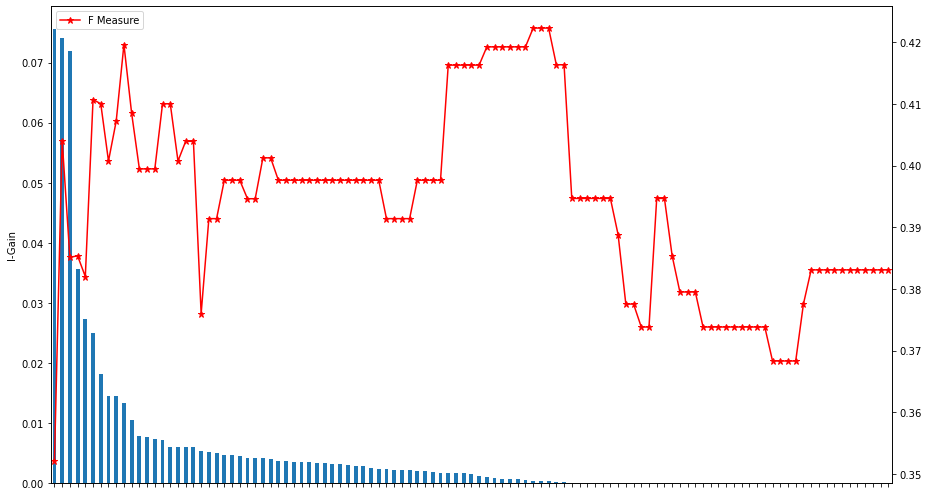

In [318]:
plt.rcParams["figure.figsize"] = [13, 7]
plt.rcParams["figure.autolayout"] = True

infoGainF = pd.concat([features_info_gain, FMeasuresSeries], axis=1).rename(columns={0 : "F Measure"}).tail(df.shape[1]-1)

fig, ax = plt.subplots()

infoGainF['I-Gain'].plot(kind='bar', ylabel="I-Gain")
infoGainF['F Measure'].plot(kind='line', marker='*', color='red', ms=7, secondary_y=True)
plt.legend(loc="upper left")

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.show()

In [319]:
pd.Series(FMeasures).sort_values(ascending=False).head(10)

65    0.422322
64    0.422322
63    0.422322
10    0.419643
62    0.419271
61    0.419271
60    0.419271
59    0.419271
58    0.419271
57    0.419271
dtype: float64

So we can see that choosing a feature subset of the top N=43 (or 44/45/46/47/48) features based on info gain returns the highest f-measure score for KNN. We can select these features and calculate the f-measures for this for each of our classifiers:

In [320]:
top_features = X_train[features_info_gain.index[:43]]
X_train1, X_test1, y_train1, y_test1 = train_test_split(top_features, y_train, random_state=1, stratify=y_train)
applyAll4AndScore(X_train1, X_test1, y_train1, y_test1)

{'KNN': 0.39764538903850355,
 'DT': 0.31955958134622153,
 'NB': 0.08030744737823696,
 'SVM': 0.4107243543961207}

Next I will apply Select K Best according to the chi-square statistic. I will compute this for increasing values of K, from K = 1, ..., No. of features. I will plot the F-Measure for each, again based on the KNN classifier.

In [321]:
FMeasures = list()

for N in range(1, features_info_gain.shape[0]+1):
    
    X_new = SelectKBest(chi2, k=N).fit_transform(X_train, y_train)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y_train, random_state=1, stratify=y_train)
    model = KNeighborsClassifier()
    model.fit(X_train1, y_train1)
    y_predicted1 = model.predict(X_test1)
    FMeasures.append(FMeasure(y_test1, y_predicted1))
    
FMeasuresSeries2 = pd.Series(FMeasures)

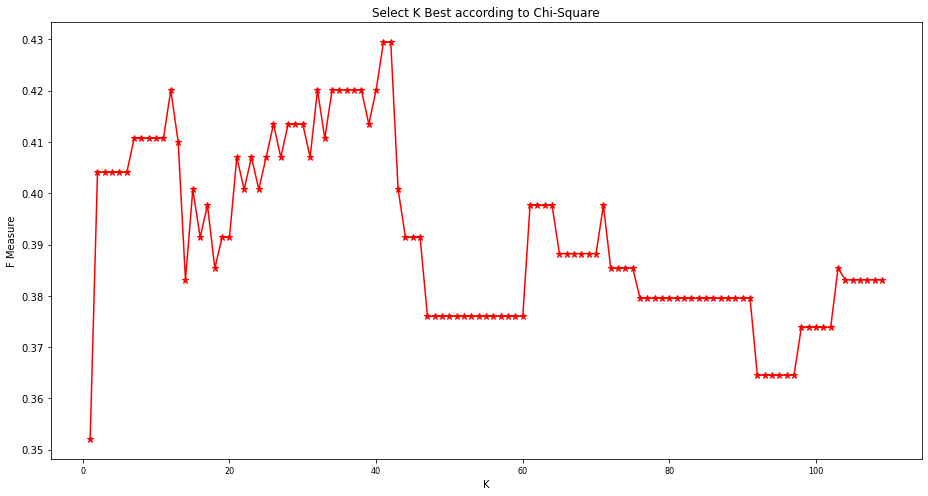

In [322]:
plt.rcParams["figure.figsize"] = [13, 7]

FMeasuresSeries2 = FMeasuresSeries2.tail(df.shape[1]-1)

fig, ax = plt.subplots()

FMeasuresSeries2.plot(kind='line', marker='*', color='red', ms=7)
plt.xticks(fontsize=8)
plt.ylabel("F Measure")
plt.xlabel("K")
plt.title("Select K Best according to Chi-Square")
plt.show()

In [323]:
FMeasuresSeries2.sort_values(ascending=False).head(10)

41    0.429447
42    0.429447
38    0.420115
37    0.420115
36    0.420115
35    0.420115
32    0.420115
34    0.420115
12    0.420115
40    0.420115
dtype: float64

So we can see that choosing k in 35-42 for select k best based on chi-square returns the highest f-measure score for KNN. We can choose k=35. I will calculate the f-measures for this for each of our classifiers:

In [324]:
X_new = SelectKBest(chi2, k=35).fit_transform(X_train, y_train)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y_train, random_state=1, stratify=y_train)
applyAll4AndScore(X_train1, X_test1, y_train1, y_test1)

{'KNN': 0.4201154163231657,
 'DT': 0.35190086621751687,
 'NB': 0.09687221207655025,
 'SVM': 0.4107243543961207}

The outcomes of the filter feature selection approaches are summaried below:

__Filters Summary__

| Technique      | Number of Features            | Outcome              |
|---------------------|-------------------------------|--------------------------------|
|Select top 50% of features based on info gain|55|{'KNN': 0.41,'DT': 0.28,'NB': 0.085,'SVM': 0.39}|
|IG > 50% of max IG score | 5 | {'KNN': 0.40,'DT': 0.33,'NB': 0.35,'SVM': 0.40} |
| IG > 0| 66 | {'KNN': 0.40,'DT': 0.29, 'NB': 0.084, 'SVM': 0.41} |
| Feature subsets of increasing size | 43 | {'KNN': 0.42, 'DT': 0.30,'NB': 0.082, 'SVM': 0.41} |
| Select K Best according to the chi-square statistic |35 | {'KNN': 0.42, 'DT': 0.34, 'NB': 0.10,'SVM': 0.41} |

The filter method of 'Select K Best according to the chi-square statistic' - which we computed for all values of K and selected the best K for KNN classifer - with K=35 returns the highest F Measure for each of the classifiers. It is therefore the best feature subset based on the filter techniques.

We can also apply wrapper techniques.

__Wrapper Feature Selection__

There are a number of problems with filter feature selection techniques. Firstly, there is no model bias. Diﬀerent features may suit diﬀerent learning algorithms, but ﬁlters do not take this into account.

Furthermore, it doesnt account for feature dependencies. In ﬁlters, the features are considered in isolation from one another, and are not considered in context. 

Wrapper selection overcomes these problems.

In wraper feature selection, the classiﬁer is “wrapped” in the feature selection mechanism. Feature subsets are evaluated directly based on their performance when used with that speciﬁc classiﬁer. Wrappers take bias of speciﬁc learning algorithm into account, and considers features in context - i.e. feature dependencies.

We saw with the wrappers that the naive bayes classifier performed very badly for most of the feature subsets, with F Measures as low as 0.082. Hoepfully when we used wrappers this will improve as we will choose features specifically suited for this classifier.

__SFS: KNN__

In [325]:
knn = KNeighborsClassifier()
sfs_forward = SFS(knn, k_features="best",  forward=True, floating=False, scoring='balanced_accuracy', cv=10)
sfs_forwardKNN = sfs_forward.fit(X_train, y_train, custom_feature_names=X_train.columns)

In [326]:
features_knn = sfs_forwardKNN.k_feature_names_
len(features_knn)

58

In [327]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train[list(features_knn)], y_train, random_state=1, stratify=y_train)

model = KNeighborsClassifier()
model.fit(X_train1, y_train1)
y_predicted1 = model.predict(X_test1)
FMeasure(y_test1, y_predicted1)

0.41964272093484467

__SFS: Decision Tree__

In [4234]:
dtc = DecisionTreeClassifier(criterion="entropy")
sfs_forward = SFS(dtc, k_features="best",  forward=True, floating=False, scoring='f1', cv=10)
sfs_forwardDTC = sfs_forward.fit(X_train, y_train, custom_feature_names=X_train.columns)

In [4263]:
features_dtc = sfs_forwardDTC.k_feature_names_
len(features_dtc)

11

In [4264]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train[list(features_dtc)], y_train, random_state=1, stratify=y_train)

model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train1, y_train1)
y_predicted1 = model.predict(X_test1)
FMeasure(y_test1, y_predicted1)

0.43475029726516057

__SFS: SVM__

In [4235]:
svm = SVC()
sfs_forward = SFS(svm, k_features="best",  forward=True, floating=False, scoring='f1', cv=10)
sfs_forwardSVM = sfs_forward.fit(X_train, y_train, custom_feature_names=X_train.columns)

In [4265]:
features_svm = sfs_forwardSVM.k_feature_names_
len(features_svm)

58

In [4266]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train[list(features_svm)], y_train, random_state=1, stratify=y_train)

model = SVC()
model.fit(X_train1, y_train1)
y_predicted1 = model.predict(X_test1)
FMeasure(y_test1, y_predicted1)

0.42699139760920557

__SFS: Naive Bayes__

In [4236]:
nbc = GaussianNB()
sfs_forward = SFS(nbc, k_features="best",  forward=True, floating=False, scoring='f1', cv=10)
sfs_forwardNBC = sfs_forward.fit(X_train, y_train, custom_feature_names=X_train.columns)

In [4267]:
features_nbc = sfs_forwardNBC.k_feature_names_
len(features_nbc)

22

In [4268]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train[list(features_nbc)], y_train, random_state=1, stratify=y_train)

model = GaussianNB()
model.fit(X_train1, y_train1)
y_predicted1 = model.predict(X_test1)
FMeasure(y_test1, y_predicted1)

0.34289586305278175

The above generated a feature subset specific to each classifier using forward sequential search, and then calculated the F Measure. The results of the filters and wrappers are summarised below. We can compare them to choose the best feature subset for each classifier:

#### Summary of Wrapper - Forward Sequential Selection

| Cassifier      | Number of Features            | F Measure              |
|---------------------|-------------------------------|--------------------------------|
|KNN|65|0.45|
|Decision Tree | 11 | 0.44 |
| SVM | 58 | 0.43 |
| Naive Bayes | 22 | 0.34 |

#### Summary of Filters

| Technique      | Number of Features            | Outcome              |
|---------------------|-------------------------------|--------------------------------|
|Select top 50% of features based on info gain|55|{'KNN': 0.41,'DT': 0.28,'NB': 0.085,'SVM': 0.39}|
|IG > 50% of max IG score | 5 | {'KNN': 0.40,'DT': 0.33,'NB': 0.33,'SVM': 0.40} |
| IG > 0| 66 | {'KNN': 0.40,'DT': 0.29, 'NB': 0.084, 'SVM': 0.41} |
| Feature subsets of increasing size | 43 | {'KNN': 0.42, 'DT': 0.30,'NB': 0.082, 'SVM': 0.41} |
| Select K Best according to the chi-square statistic |35 | {'KNN': 0.42, 'DT': 0.34, 'NB': 0.10,'SVM': 0.41} |

#### Summary for each classifier

__<center>KNN</center>__

| Method | F |
|---|---|
|Wrapper: SFS | 0.45 |
|Filter: Select top 50% of features based on info gain | 0.41 |
| Filter:IG > 50% of max IG score	| 0.4 |
| FIlter: IG > 0	| 0.4 |
| Filter: Feature subsets of increasing size | 0.42 |
| Select K Best according to the chi-square statistic | 0.42 |

__<center>DT</center>__

| Method | F |
|---|---|
|Wrapper: SFS | 0.44 |
|Filter: Select top 50% of features based on info gain | 0.28 |
| Filter:IG > 50% of max IG score	| 0.33 |
| FIlter: IG > 0	| 0.29 |
| Filter: Feature subsets of increasing size | 0.3 |
| Select K Best according to the chi-square statistic | 0.34 |

__<center>NB</center>__

| Method | F |
|---|---|
|Wrapper: SFS | 0.34 |
|Filter: Select top 50% of features based on info gain | 0.085 |
| Filter:IG > 50% of max IG score	| 0.33 |
| FIlter: IG > 0	| 0.084 |
| Filter: Feature subsets of increasing size | 0.082 |
| Select K Best according to the chi-square statistic | 0.1 |

__<center>SVC</center>__

| Method | F |
|---|---|
|Wrapper: SFS | 0.43 |
|Filter: Select top 50% of features based on info gain | 0.39 |
| Filter:IG > 50% of max IG score	| 0.4 |
| FIlter: IG > 0	| 0.41 |
| Filter: Feature subsets of increasing size | 0.41 |
| Select K Best according to the chi-square statistic | 0.41 |


From the above table we can clearly see that the feature subset generated for each classifier using forward sequential search performs the best for each classifier. 

Thus, I will use the the SFS generated feature subset specific to each classifier for that classifier.

Previously we ranked the features based on information gain (information gain is essentially the reduce in uncertainty by including that feature):

In [5166]:
features_info_gain.head(10)

,I-Gain
Animal Type_Other,0.086561
Sex upon Outcome_Unknown,0.075470
Breed_Bat,0.071658
Age upon Income (Days),0.063168
Name,0.049027
Animal Type_Dog,0.023962
Sex upon Outcome_Spayed Female,0.020915
Sex upon Outcome_Neutered Male,0.017330
Color_Brown,0.015811
sin_Hour,0.015207


The feature with the highest information gain is Animal Type_Other.

In [5173]:
animalType = pd.concat([x_train["Animal Type_Other"], pd.Series(y_train)], axis=1)
animalType

,Animal Type_Other,Outcome
1093,0.0,0
2558,0.0,0
1660,0.0,0
4464,0.0,0
3175,0.0,0
...,...,...
1487,0.0,0
4182,0.0,0
1704,0.0,0
4816,0.0,0


In [5190]:
animalOtherCount = len(animalType.loc[animalType["Animal Type_Other"]==1])
print("Count of animal type Other")
animalOtherCount

223

In [5191]:
animalOtherPositiveCount = animalType.loc[(animalType["Animal Type_Other"]==1)  & (animalType["Outcome"]==1)].shape[0]
print("Count of animal type Other with Outcome=1")
animalOtherPositiveCount

161

In [5193]:
print("% of animal type Other with Outcome=1")
animalOtherPositiveCount*100/animalOtherCount

% of animal type Other with Outcome=1


72.19730941704036

We can see that in our test data, 72% of the animals which were of type other (i.e. not a dog, cat or bird) died. Because of this the information gain is high. It is possible that the shelter don't know how to take care of these animals as well as they have a much smaller amount of these animals coming in. It will be useful for this feature to be included in the model, as it will mean that animals of type Other in the future may be flagged as high risk using the model, and extra care can be given to them.

We can also see that Sex Upon Outcome Unknown has a high information gain.

In [5197]:
sex = pd.concat([x_train["Sex upon Outcome_Unknown"], pd.Series(y_train)], axis=1)
sexUnknownCount = len(sex.loc[sex["Sex upon Outcome_Unknown"]==1])
sexUnknownPositiveCount = sex.loc[(sex["Sex upon Outcome_Unknown"]==1)  & (sex["Outcome"]==1)].shape[0]
sexUnknownPositiveCount*100/sexUnknownCount

57.189542483660134

57% of animals where we don't know if they have been neutered / spayed have died. It is possible that there is a link to the animals which we don't know if they have been neutered / spayed being strays vs the animals which we do know if they have been neutered / spayed being pets, and this having an effect on their death risk.

We can see below that the only feature common to all feature subsets generated by the SFS for each classifier is age upon outcome:

In [5209]:
((set(features_knn).intersection(set(features_dtc))).intersection(set(features_svm))).intersection(set(features_nbc))

{'Age upon Outcome (Days)'}

The age that the animal is when they leave the shelter (either through discharge or death) helps to predict the outcome (whether the animal died or was safely discharged).

This may be because older animals, or very young animals that have just been born, have a higher chance of dying.

### <font color='steelblue'>Evaluation</font>

I now want to evaluate the performance of each of my different classifiers. I must first decide on the metrics to use to classify. A lot of this I already discussed when deciding how to evaluate the the feature subsets during feature selection.

As mentioned previously, I will steer away from Accuracy, as the dataset is very imbalanced. We will get a very high accuracy even if our classifiers predict all examples as negative, due to the very low percentage of positive examples. Therefore, to get the best feature subset we must use better evaluation metrics.

I discussed previously the consequences of a false positive and false negative. Recall;

Positive => animal is at risk, Negative => animal is not at risk

True Positive: Correctly classify at-risk animal as at risk. 

False Positive: Incorrectly classify not at-risk animal as at-risk. True Negative: Correctly classify not at-risk animal as not at-risk. False Negative: Incorrectly classify at-risk animal as not at-risk.

Consequences for False Positive: An animal which is not at risk now may unnecessarily have more care and attention given to it.

Consequences for False Negative: An animal which is at risk may die due to the extra care and attention which it needed not being provided.

It is therefore very clear that the risk of a false negative is far worse than the risk of a false positive.

Precision and recall are more suitable metrics to use in this type of inbalanced classification problem.

Precision is the proportion of retrieved results that are relevant. It is calculated as the rate of true positives divided by the sum of true positives and false positives. In the context of the question, it is the proportion of animals which were classified by the model as at-risk that are actually at-risk. Precision should be favoured when the penalty of incorrectly classifying a not at-risk animal as at-risk is very serious, but we don’t mind some at-risk animals being incorrectly classified as not at-risk.

Recall, also known as the sensitivity, is the proportion of relevant results that are retrieved. In the context of the question, this is the proportion of all at-risk animals that were actually classified as at-risk. Recall should be favoured when the penalty of incorrectly classfying at-risk animals as not at-risk is very serious, but we don’t mind some not at-risk animals being classified as at-risk.

Therefore, it is clear that we should be favouring recall.

The F-Measure is a single measure that trades off precision against recall. It is calculated as (1 + B^2)(Precision)(Recall) / (B^2)(Precision + Recall). The B parameter controls the trade-off. B<1 focuses on precision, B>1 focuses on recall, and B=1 treats both precision and recall equally, known as the harmonic mean.

For my feature selection I used the F-Measure. I wanted to favour recall so I used B>1. It is still important that we don't have too many false positives, we don't mind a few but if we have too many this could mean that the at-risk animals are not getting enough help as the shelter workers are typing to help all of the many animals that were wrongly classified as at risk also. Thus, I chose B>1 but not too large as precision is still also important. I therefore chose B=1.5.

I consider the F-Measure to be the most important for this problem as it allows us to put more weight on recall, which is important due to the major imbalance in the conequences of a false negative vs a false positive. 

I will however also use a number of other metrics.

Data is imbalaced so I will use balanced accuracy measures:

Balance Accuracy Rate (BAR): Mean of TP Rate and TN Rate, the average of correct classifications on each class

Balance Error Rate (BER): Mean of FP Rate and FN Rate, the average of the errors on each class

where
	
TPRate = the proportion which were actualy at-risk(+) that the model correctly mark as at-rik (+)
TNRate = the proportion which were actualy not at-risk(-) that the model correctly mark as not at-risk (-)
FPRate = the proportion which were actualy not at-risk(-) that the model incorrectly mark as at-risk (+)
FN Rate = the proportion which were actualy at-risk (+) that the model incorrectly mark as not at-risk(-)

For each classifier, I will use the parameters generated previosuly specifically for that classifier using SFS.

For each classifier, I will start by getting a baseline, by testing the classifier with no hyperparameters specified, to get an idea of the performance. 

To get the baseline I will use cross validation.

Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.

For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set.

Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets. Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

In order to train and test the model using cross-validation, I will use the ‘cross_val_score’. ‘cross_val_score’ takes in our model and our data as parameters. Then it splits our data into groups (number of groups specified as parameter) and fits and scores our data for each group. 

We can then get the average score for each parameter.

The defualt score metric is accuracy. Instead I will use F measure and balanced accuracy rate. To do this I will have to define custom scoring functions.

Once I have the baseline I will move on to parameter tuning.

I will tune the hyperparameters using grid search cross validation.

GridSearchCV works by training the model multiple times on a range of specified parameters. That way, we can test our model with each parameter and figure out the optimal values to get the best results.

For GridSearchCV i will choose 5 folds, so we will have about 800 instances per fold. This was each fold should contain sufficient variation such that the underlining distribution is represented. 5 folds means that 20% of the data is used for testing. Becuase I did an 80/20 split originally I think it makes sense to continue that here for the same reason.

For each classifier I will tune a number of parameters individually first. I will tune them based on BAR and based on F Measure seperately. 

I will then tune different combinations of the parameters in the same way.

Finally, I will test each combinations of parameters using cross validation.

All of this so far is done on my training data. I will choose the combination of parameters which performed the best on the training data, and will use these parameters to test the classifier using the test data which I set aside earlier before the feature selection.

This way the original test data is only used to test the final chosen model for each classifier. We test with the test data to see how the classifer performs for unseen data.

Before I can tune and evaluate the models I will define a number of helpful functions:

We can make use of the confusion matrix to calculate the balanced error rate, as we do not have a built-in function for this like we do for the balanced accuracy rate. There are a lot of useful things we can extract from the confusion matrix. I will define a function which will return the confusion matrix, true and false postitive and negative rates, BAR, and BER, for a given set of actual and predicted y values:

In [4318]:
def confusionMatrixMetrics(y, y_predicted, p=False, pList=["F Measure", "BAR", "BER"]):

    cmDict = {}
    
    confusionmatrix = confusion_matrix(y, y_predicted)

    FP = confusionmatrix.sum(axis=0) - np.diag(confusionmatrix)  
    FN = confusionmatrix.sum(axis=1) - np.diag(confusionmatrix)
    TP = np.diag(confusionmatrix)
    TN = confusionmatrix.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)

    # Specificity or true negative rate
    TNR = TN/(TN+FP) 

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)
    

    
    cm = pd.DataFrame(confusionmatrix, columns=["Predicted: At-Risk", "Predicted: Not At-Risk"])
    cm = cm.set_axis(['Actual: At-Risk', 'Actual: Not At-Risk'])
    cmDict["CM"]=cm
           
    cmDict["TPR"] = TPR[0]
    cmDict["TNR"] = TNR[0]
    cmDict["FPR"] = FPR[0]
    cmDict["FNR"] = FNR[0]
    cmDict["BAR"] = balanced_accuracy_score(y, y_predicted)
    cmDict["BER"] = (FPR[0] + FNR[0])/2
    
    cmDict["F Measure"] = FMeasure(y, y_predicted)
    cmDict["FP"] = FP[0]
    cmDict["FN"] = FN[0]
    cmDict["TP"] = TP[0]
    cmDict["TN"] = TN[0]
    
    if p:
        for metric in pList:
            print(metric, ":", round(cmDict[metric], 3))

    
    return cmDict

__KNN__

First I will fit a KNN classifier with default parameters to get a __baseline__.

In [4742]:
# custom scoring function for f measure
def custom_score_F(estimator, X, y):
    y_predicted = estimator.predict(X)
    return FMeasure(y, y_predicted)

score1 = make_scorer(custom_score_F, greater_is_better=True)

In [4753]:
# custom scoring function for balanced accuracy rate
def custom_score_BAR(estimator, X, y):
    y_predicted = estimator.predict(X)
    return confusionMatrixMetrics(y, y_predicted)["BAR"]

score2 = make_scorer(custom_score_BAR, greater_is_better=True)

Now that I have defined my scoring functions I will perform 100-fold cross validation to get an average F Measure and BAR for the baseline.

In [4813]:
knnTrainingData = X_train[list(features_knn)]
knnTrainingData.head(3)

,Name,Age upon Outcome (Days),sin_Hour,Breed_American,Breed_Australian Cattle Dog,Breed_Australian Kelpie,Breed_Bat,Breed_Beagle,Breed_Belgian Malinois,Breed_Black,...,Breed_Whippet,Color_Blue,Color_Blue Merle,Color_Chocolate,Color_Cream,Color_Lynx Point,Color_Red,Color_Sable,Color_Yellow,Animal Type_Bird
1093,0,0.036854,0.431758,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2558,0,0.024524,0.027769,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1660,0,0.016304,0.431758,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4896]:
scoring = {custom_score_BAR : "BAR", custom_score_F : "F"}
knnBaseline = {}

for score in scoring.keys():
    
    #create a new KNN model
    knn_cv = KNeighborsClassifier()

    #train model with cv of 100
    cv_scores = cross_val_score(knn_cv, knnTrainingData, y_train, cv=100, scoring=score)

    # get each cv score (accuracy) and average them
    print("Score Metric: ", scoring[score])

    print('cv_scores mean:{}\n'.format(np.mean(cv_scores)))
    
    knnBaseline[scoring[score]]=np.mean(cv_scores)

Score Metric:  BAR
cv_scores mean:0.7793543543543542

Score Metric:  F
cv_scores mean:0.44465821572934916



We now have a baseline for our knn classifier:

In [4818]:
knnBaseline

{'BAR': 0.7793543543543542, 'F': 0.44465821572934916}

Now that we have a baseline we can move on to tuning our KNN parameters.

Hypertuning model parameters using GridSearchCV
When I built the initial baseline k-NN model I didn't specify any hyperparameters.

Hypertuning parameters is when you go through a process to find the optimal parameters for your model to improve accuracy. I will start by using GridSearchCV to find the optimal value for ‘__n_neighbors__’.

GridSearchCV works by training the model multiple times on a range of specified parameters. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

For the model, I will specify a range of values for ‘n_neighbors’ in order to see which value works best for the model. To do this, I will create a dictionary, setting ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 24.

The new model using grid search will take in a new k-NN classifier, the param_grid and a cross-validation value in order to find the optimal value for ‘n_neighbors’.

In [4779]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5, scoring=custom_score_BAR)

#fit model to data
knn_gscv.fit(knnTrainingData, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring=<function custom_score_BAR at 0x7f7ee2c36430>)

In [4780]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

In [4788]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv2 = GridSearchCV(knn2, param_grid, cv=5, scoring=custom_score_F)

#fit model to data
knn_gscv2.fit(knnTrainingData, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring=<function custom_score_F at 0x7f7eccc7a280>)

In [4789]:
#check top performing n_neighbors value
knn_gscv2.best_params_

{'n_neighbors': 5}

We can also test this without doing grid search cross validation. For N=1, ..., 10 I will fit KNN with n=N for the train split of the train data, and then test using both the training and test splits from the training data. I will evaluate using BAR and F Measure.

In [5297]:
def neighboursParamKNN(X_train1, X_test1, y_train1, y_test1, metric = "BAR", N=10):
    neighbors = list(range(1,N))
    train_results = []
    test_results = []

    for n in neighbors:
        model = KNeighborsClassifier(n_neighbors=n)
        model.fit(X_train1, y_train1)

        # test on training data
        train_pred = model.predict(X_train1)
        res = confusionMatrixMetrics(y_train1, train_pred)[metric]
        train_results.append(res)


        # test on test data
        y_pred = model.predict(X_test1)    
        res = confusionMatrixMetrics(y_test1, y_pred)[metric]
        test_results.append(res)

    matplotlib.rc('xtick', labelsize=8) 
    plt.figure(figsize=(12, 6))
    plt.title("%s for varying values of n_neighbours parameter" %metric)
    line1, = plt.plot(neighbors, train_results, 'b', label="Train")
    line2, = plt.plot(neighbors, test_results, 'r', label="Test")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel(metric)
    plt.xlabel("n_neighbors")
    plt.minorticks_on()
    plt.grid(linewidth=0.5, alpha=0.3, which="major")
    plt.grid(linewidth=0.5, alpha=0.1, which="minor")
    plt.show()

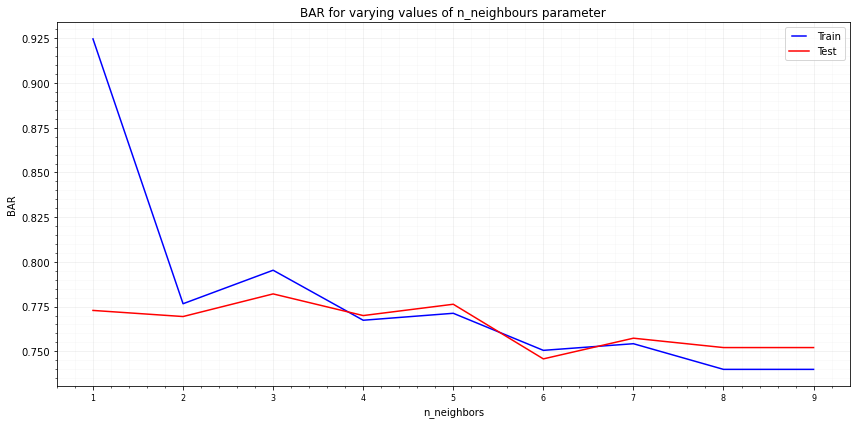

In [5298]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(knnTrainingData, y_train, random_state=1, stratify=y_train)

neighboursParamKNN(X_train1, X_test1, y_train1, y_test1, metric = "BAR")

We can see that the highest BAR value is when the number of neighbours is 3. This is the same as the result using CV.

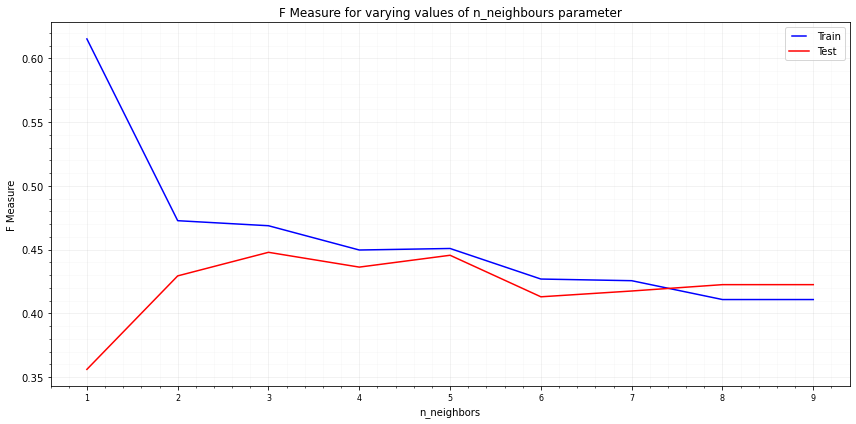

In [5299]:
neighboursParamKNN(X_train1, X_test1, y_train1, y_test1, metric = "F Measure")

We can see that the highest F Measure value is when the number of neighbours is 5. This is the same as the result using CV.

We are most interested in maximising the F Measure so I will choose n=5. We can see from the graph for BAR that we still get very high BAR for 5 neighbours.

| Paramater(s): | Optimal for Metric: |
|---------------------|--------------------|
|{n_neighbors:5} | BAR & F |


Next we can tune the __p parameter__. This is the power parameter for the Minkowski metric. When p=1, this is equivalent to using manhattan distance, and euclidean distance for p=2. For arbitrary p, minkowski distance is used.

In [4793]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'p': np.arange(1, 5)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5, scoring=custom_score_BAR)

#fit model to data
knn_gscv.fit(knnTrainingData, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'p': array([1, 2, 3, 4])},
             scoring=<function custom_score_BAR at 0x7f7ee2c36430>)

In [4794]:
knn_gscv.best_params_

{'p': 2}

In [4799]:
# create new a knn model
knn2 = KNeighborsClassifier()

# create a dictionary of all values we want to test for n_neighbors
param_grid = {'p': np.arange(1, 5)}

# use gridsearch to test all values for n_neighbors
knn_gscv2 = GridSearchCV(knn2, param_grid, cv=5, scoring=custom_score_F)

# fit model to data
knn_gscv2.fit(knnTrainingData, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'p': array([1, 2, 3, 4])},
             scoring=<function custom_score_F at 0x7f7eccc7a280>)

In [4800]:
knn_gscv2.best_params_

{'p': 2}

The value for the p parameter that yields the highest BAR and F is p=2. We can again check this without performing CV:

In [5300]:
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D

def pParamKNN(X_train1, X_test1, y_train1, y_test1, metric = "BAR", N=20):
    
    distances = [1, 2, 3, 4, 5]
    train_results = []
    test_results = []

    for p in distances:
        model = KNeighborsClassifier(p=p)
        model.fit(X_train1, y_train1)

        # test on training data
        train_pred = model.predict(X_train1)
        res = confusionMatrixMetrics(y_train1, train_pred)[metric]
        train_results.append(res)


        # test on test data
        y_pred = model.predict(X_test1)    
        res = confusionMatrixMetrics(y_test1, y_pred)[metric]
        test_results.append(res)

    matplotlib.rc('xtick', labelsize=8) 
    
    plt.figure(figsize=(12, 6))
    plt.title("%s for varying values of p parameter" %metric)
    line1, = plt.plot(distances, train_results, 'b', label="Train")
    line2, = plt.plot(distances, test_results, 'r', label="Test")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel(metric)
    plt.xlabel("p")
    plt.minorticks_on()
    plt.grid(linewidth=0.5, alpha=0.3, which="major")
    plt.grid(linewidth=0.5, alpha=0.1, which="minor")
    plt.show()

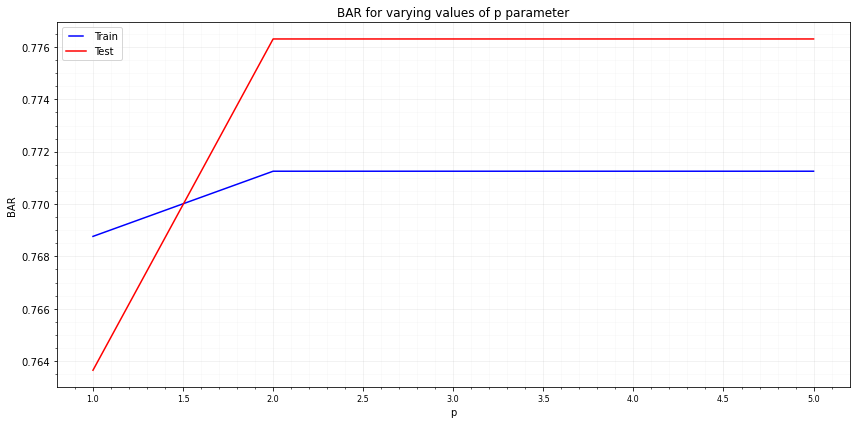

In [5301]:
pParamKNN(X_train1, X_test1, y_train1, y_test1, metric = "BAR")

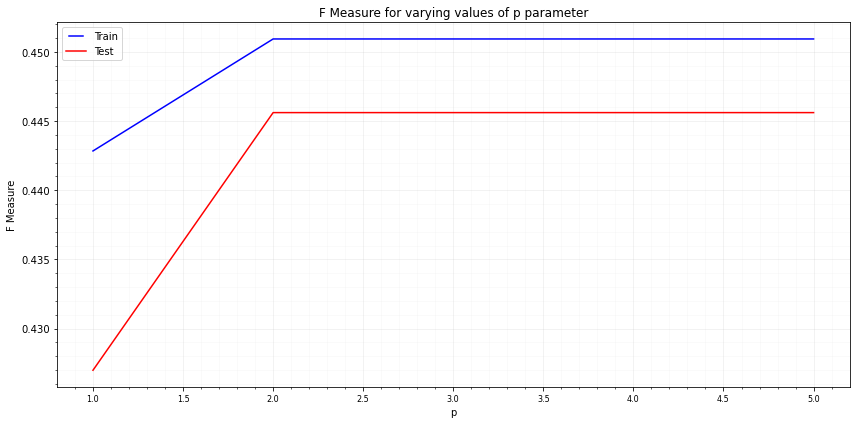

In [5302]:
pParamKNN(X_train1, X_test1, y_train1, y_test1, metric = "F Measure")

For the test data the highest values for both F and BAR are when p = 2. 

This is consistent with the grid search cross validation result. The best value of p to choose is 2, which refers to euclidean distance.

| Paramater(s): | Optimal for Metric: |
|---------------------|--------------------|
|{n_neighbors:5} | BAR & F |
| {p:2} | BAR & F|

We also need to consider combinations of parameters. We can use grid search cross validation again to find the best values of p AND n neighbours based on BAR and F:

In [4803]:
#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'p': np.arange(1, 5), 'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring=custom_score_BAR)

#fit model to data
knn_gscv.fit(knnTrainingData, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': array([1, 2, 3, 4])},
             scoring=<function custom_score_BAR at 0x7f7ee2c36430>)

In [4804]:
knn_gscv.best_params_

{'n_neighbors': 1, 'p': 4}

In [4805]:
#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'p': np.arange(1, 5), 'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring=custom_score_F)

#fit model to data
knn_gscv.fit(knnTrainingData, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': array([1, 2, 3, 4])},
             scoring=<function custom_score_F at 0x7f7eccc7a280>)

In [4806]:
knn_gscv.best_params_

{'n_neighbors': 5, 'p': 2}

This gives the best params for highest BAR as: {'n_neighbors': 1, 'p': 4} and for highest F as: {'n_neighbors': 5, 'p': 2}.

| Paramater(s): | Optimal for Metric: |
|---------------------|--------------------|
|{n_neighbors:5} | BAR & F |
| {p:2} | BAR & F|
|{p:4, n_neighbors:1} | BAR |
| {p:2, n_neighbors:5} | F |

So our options now are to choose just our optimal n neighbours, just our optimal p, or one of these p and neighbours combinations.

I will again use cross validation to test each of these combinations:

In [4895]:
scoring = {custom_score_BAR : "BAR", custom_score_F : "F"}


for i in range(0, 4):
    
    param = ["p=2", "n_neighbors=5", "p=4, n_neighbors=1", "p=2, n_neighbors=5"]
    print("\nParameters: ", param[i], "\n")

    for score in scoring.keys():

        knn_cv_p = KNeighborsClassifier(p=2)
        knn_cv_n = KNeighborsClassifier(n_neighbors=5)
        knn_cv_pANDn1 = KNeighborsClassifier(p=4, n_neighbors=1)
        knn_cv_pANDn2 = KNeighborsClassifier(p=2, n_neighbors=5)
        
        knn=[knn_cv_p, knn_cv_n, knn_cv_pANDn1, knn_cv_pANDn2]
        knn_cv = knn[i]

        #train model with cv of 100
        cv_scores = cross_val_score(knn_cv, knnTrainingData, y_train, cv=5, scoring=score)

        # get each cv score (accuracy) and average them
        print("\t", scoring[score], format(np.mean(cv_scores)))



Parameters:  p=2 

	 BAR 0.7683842026759278
	 F 0.43397524111457547

Parameters:  n_neighbors=5 

	 BAR 0.7683842026759278
	 F 0.43397524111457547

Parameters:  p=4, n_neighbors=1 

	 BAR 0.7732679239297402
	 F 0.3306117294051586

Parameters:  p=2, n_neighbors=5 

	 BAR 0.7683842026759278
	 F 0.43397524111457547


In [4908]:
knnBaseline

{'BAR': 0.7793543543543542, 'F': 0.44465821572934916}

We get the same results for [p=2] , [n_neighbors=5] and [p=2 AND n_neighbors=5].

We get a slightly higher BAR but lower F for [n_neighbors=5]. As discussed previously I consider F more important in the context. For all 3 other parameter combination we get the same BAR and F measures. 

However, our baseline model with no parameters performs better than all of these combinations for both F and BAR, so we will go with no parameters.

Now  can test our KNN classifier using the test data that we set aside before the feature selection:

In [4997]:
knnTrainingData = X_train[list(features_knn)]
knnTestData = X_test[list(features_knn)]

knnModel = KNeighborsClassifier()

knnModel.fit(knnTrainingData, y_train)

y_predicted_KNNTest = knnModel.predict(knnTestData)

print("Unseen test Data:\n")
metrics = confusionMatrixMetrics(y_test, y_predicted_KNNTest, p=True)

Unseen test Data:

F Measure : 0.422
BAR : 0.761
BER : 0.239


In [4897]:
knnBaseline

{'BAR': 0.7793543543543542, 'F': 0.44465821572934916}

For the test data, The F and BAR meaures are very slightly less than the baseline, but in general it seems that the classifier generalises well for the unseen test data.

|Model Name| Classifier Type | F Measure | BAR |
|---------|---------|--------|---|
|knnModel|KNN | 0.422 | 0.761 |

__Decision Tree__

We can again start by using cross validation to get a baseline:

In [4994]:
dtcTrainingData = X_train[list(features_dtc)]
dtcTrainingData.head(5)

,Age upon Outcome (Days),Breed_Opossum,Breed_Rabbit Sh,Breed_Squirrel,Color_Brown Brindle,Color_Other,Color_Sable,Animal Type_Dog,Animal Type_Other,Sex upon Outcome_Intact Male,Sex upon Outcome_Unknown
1093,0.036854,0,0,0,0,0,0,1.0,0.0,0.0,0.0
2558,0.024524,0,0,0,0,0,0,1.0,0.0,0.0,0.0
1660,0.016304,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4464,0.049870,0,0,0,0,0,0,1.0,0.0,0.0,0.0
3175,0.249897,0,0,0,0,0,0,1.0,0.0,0.0,0.0


In [4824]:
scoring = {custom_score_BAR : "BAR", custom_score_F : "F"}
dtcBaseline = {}

for score in scoring.keys():
    
    #create a new DTC model
    dtc_cv = DecisionTreeClassifier()

    #train model with cv of 100
    cv_scores = cross_val_score(dtc_cv, dtcTrainingData, y_train, cv=100, scoring=score)

    # get each cv score (accuracy) and average them
    print("Score Metric: ", scoring[score])

    print('cv_scores mean:{}\n'.format(np.mean(cv_scores)))
    
    dtcBaseline[scoring[score]]=np.mean(cv_scores)

Score Metric:  BAR
cv_scores mean:0.7757469969969969

Score Metric:  F
cv_scores mean:0.435211256305178



Our baseline is:

In [4825]:
dtcBaseline

{'BAR': 0.7757469969969969, 'F': 0.435211256305178}

__max_depth__

The first parameter we can tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. 

We can use grid search cross validation to get the optimal max depth value to maximise F and BAR:

In [4880]:
#create new a dtc model
dtc2 = DecisionTreeClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'max_depth': np.arange(1, 35)}

#use gridsearch to test all values for n_neighbors
dtc_gscv = GridSearchCV(dtc2, param_grid, cv=5, scoring=custom_score_BAR)

#fit model to data
dtc_gscv.fit(dtcTrainingData, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])},
             scoring=<function custom_score_BAR at 0x7f7ee2c36430>)

In [4881]:
dtc_gscv.best_params_

{'max_depth': 13}

In [4830]:
#create new a dtc model
dtc2 = DecisionTreeClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'max_depth': np.arange(1, 35)}

#use gridsearch to test all values for n_neighbors
dtc_gscv = GridSearchCV(dtc2, param_grid, cv=5, scoring=custom_score_F)

#fit model to data
dtc_gscv.fit(dtcTrainingData, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])},
             scoring=<function custom_score_F at 0x7f7eccc7a280>)

In [4831]:
dtc_gscv.best_params_

{'max_depth': 7}

| Paramater(s): | Optimal for Metric: |
|---------------------|--------------------|
|{'max_depth': 13} | BAR |
| {'max_depth': 7} | F |

__min_samples_split__

Next we can tune min_samples_split. min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

In [4842]:
#create new a dtc model
dtc2 = DecisionTreeClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)}

#use gridsearch to test all values for n_neighbors
dtc_gscv = GridSearchCV(dtc2, param_grid, cv=5, scoring=custom_score_BAR)

#fit model to data
dtc_gscv.fit(dtcTrainingData, y_train) 
dtc_gscv.best_params_

{'min_samples_split': 1.0}

In [4843]:
#create new a dtc model
dtc2 = DecisionTreeClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)}

#use gridsearch to test all values for n_neighbors
dtc_gscv = GridSearchCV(dtc2, param_grid, cv=5, scoring=custom_score_F)

#fit model to data
dtc_gscv.fit(dtcTrainingData, y_train) 
dtc_gscv.best_params_

{'min_samples_split': 1.0}

| Paramater(s): | Optimal for Metric: |
|---------------------|--------------------|
|{'max_depth': 13} | BAR |
| {'max_depth': 7} | F |
| {'min_samples_split':1.0} | BAR & F |

__min_samples_leaf__

min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

In [4846]:
#create new a dtc model
dtc2 = DecisionTreeClassifier()

#create a dictionary of all values we want to test
param_grid = {'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}

#use gridsearch to test all values
dtc_gscv = GridSearchCV(dtc2, param_grid, cv=5, scoring=custom_score_BAR)

#fit model to data
dtc_gscv.fit(dtcTrainingData, y_train) 
dtc_gscv.best_params_

{'min_samples_leaf': 0.1}

In [4847]:
#create new a dtc model
dtc2 = DecisionTreeClassifier()

#create a dictionary of all values we want to test
param_grid = {'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}

#use gridsearch to test all values
dtc_gscv = GridSearchCV(dtc2, param_grid, cv=5, scoring=custom_score_F)

#fit model to data
dtc_gscv.fit(dtcTrainingData, y_train) 
dtc_gscv.best_params_

{'min_samples_leaf': 0.1}

| Paramater(s): | Optimal for Metric: |
|---------------------|--------------------|
|{'max_depth': 13} | BAR |
| {'max_depth': 7} | F |
| {'min_samples_split':1.0} | BAR & F |
| {'min_samples_leaf': 0.1} | BAR & F |

Now we can parameter tune for different combinations for the parameters, for both BAR and F scoring:

In [ ]:
def cvParams(paramDict, scoringMeasure):
    #create new a dtc model
    dtc2 = DecisionTreeClassifier()

    #create a dictionary of all values we want to test
    param_grid = paramDict

    #use gridsearch to test all values
    dtc_gscv = GridSearchCV(dtc2, param_grid, cv=5, scoring=scoringMeasure)

    #fit model to data
    dtc_gscv.fit(dtcTrainingData, y_train) 
    return dtc_gscv.best_params_

In [4884]:
# max depth and min smaples split for BAR
cvParams({'max_depth': np.arange(1, 35),'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)}, custom_score_BAR)

{'max_depth': 1, 'min_samples_split': 0.1}

In [4886]:
# max depth and min samples lead for BAR
cvParams({'max_depth': np.arange(1, 35), 
          'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}, custom_score_BAR)

{'max_depth': 1, 'min_samples_leaf': 0.1}

In [4888]:
# min samples leaf and split for BAR
cvParams({'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True), 
 'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}, custom_score_BAR)

{'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [4890]:
# All 3 params for BAR
cvParams({'max_depth': np.arange(1, 35), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True), 
 'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)},custom_score_BAR)

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

| Paramater(s): | Optimal for Metric: |
|---------------------|--------------------|
|{'max_depth': 13} | BAR |
| {'max_depth': 7} | F |
| {'min_samples_split':1.0} | BAR & F |
| {'min_samples_leaf': 0.1} | BAR & F |
| {'max_depth': 1, 'min_samples_split': 0.1} | BAR |
| {'max_depth': 1, 'min_samples_leaf': 0.1} | BAR |
| {'min_samples_leaf': 0.1, 'min_samples_split': 0.1} | BAR |
| {'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1} | BAR |

In [4891]:
cvParams({'max_depth': np.arange(1, 35),'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)}, custom_score_F)

{'max_depth': 1, 'min_samples_split': 0.1}

In [4892]:
cvParams({'max_depth': np.arange(1, 35), 
          'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}, custom_score_F)

{'max_depth': 1, 'min_samples_leaf': 0.1}

In [4893]:
cvParams({'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True), 
 'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}, custom_score_F)

/Users/DervlaScully/opt/anaconda3/lib/python3.8/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


{'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [4894]:
cvParams({'max_depth': np.arange(1, 35), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True), 
 'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)},custom_score_F)

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

We get the same parameter values for F and BAR.

| Paramater(s): | Optimal for Metric: |
|---------------------|--------------------|
|{'max_depth': 13} | BAR |
| {'max_depth': 7} | F |
| {'min_samples_split':1.0} | BAR & F |
| {'min_samples_leaf': 0.1} | BAR & F |
| {'max_depth': 1, 'min_samples_split': 0.1} | BAR & F |
| {'max_depth': 1, 'min_samples_leaf': 0.1} | BAR & F|
| {'min_samples_leaf': 0.1, 'min_samples_split': 0.1} | BAR & F|
| {'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1} | BAR & F |

In [4900]:
scoring = {custom_score_BAR : "BAR", custom_score_F : "F"}

for i in range(0, 8):
    
    param = ["max_depth=13", "max_depth=7", "min_samples_split=1.0", "min_samples_leaf=0.1",
             "max_depth=1, min_samples_split=0.1", "max_depth=1, min_samples_leaf=0.1",
             "in_samples_leaf=0.1, min_samples_split=0.1",
             "max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1"
            ]
    print("\nParameters: ", param[i], "\n")

    for score in scoring.keys():

        dtc1 = DecisionTreeClassifier(max_depth=13)
        dtc2 = DecisionTreeClassifier(max_depth=7)
        dtc3 = DecisionTreeClassifier(min_samples_split=1.0)
        dtc4 = DecisionTreeClassifier(min_samples_leaf=0.1)
        dtc5 = DecisionTreeClassifier(max_depth=1, min_samples_split=0.1)
        dtc6 = DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1)
        dtc7 = DecisionTreeClassifier(min_samples_leaf=0.1, min_samples_split=0.1)
        dtc8 = DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)
        
        dtc=[dtc1, dtc2, dtc3, dtc4, dtc5, dtc6, dtc7, dtc8]
        dtc_cv = dtc[i]

        #train model with cv of 100
        cv_scores = cross_val_score(dtc_cv, dtcTrainingData, y_train, cv=5, scoring=score)

        # get each cv score (accuracy) and average them
        print("\t", scoring[score], format(np.mean(cv_scores)))



Parameters:  max_depth=13 

	 BAR 0.770871596651751
	 F 0.42648952501116055

Parameters:  max_depth=7 

	 BAR 0.7653120060553441
	 F 0.43292474644625223

Parameters:  min_samples_split=1.0 

	 BAR 0.7478484883902136
	 F 0.3453671405039745

Parameters:  min_samples_leaf=0.1 

	 BAR 0.5
	 F 0.0

Parameters:  max_depth=1, min_samples_split=0.1 

	 BAR 0.7478484883902136
	 F 0.3453671405039745

Parameters:  max_depth=1, min_samples_leaf=0.1 

	 BAR 0.5
	 F 0.0

Parameters:  in_samples_leaf=0.1, min_samples_split=0.1 

	 BAR 0.5
	 F 0.0

Parameters:  max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1 

	 BAR 0.5
	 F 0.0


In [4910]:
dtcBaseline

{'BAR': 0.7757469969969969, 'F': 0.435211256305178}

We can immediately see that the best set of parameters is {max_depth=7} as it has the highest F Measure and still has a very high BAR measure:

BAR 0.7653120060553441
F 0.43292474644625223

However, our baseline with no parameters is slightly better for both F and BAR.

We can now test our DT classifier with the original test data that we set aside before feature selection, and since our baseline with no parameters was better than our tuned parameters I won't specifiy any parameters.

In [4998]:
dtcTrainingData = X_train[list(features_dtc)]
dtcTestData = X_test[list(features_dtc)]

dtcModel = DecisionTreeClassifier()

dtcModel.fit(dtcTrainingData, y_train)

y_predicted_DTCTest = dtcModel.predict(dtcTestData)

print("Unseen test Data:\n")
metrics = confusionMatrixMetrics(y_test, y_predicted_DTCTest, p=True)

Unseen test Data:

F Measure : 0.38
BAR : 0.74
BER : 0.26


We can compare this to the baseline:

In [4901]:
dtcBaseline

{'BAR': 0.7757469969969969, 'F': 0.435211256305178}

Both the F and BAR values are less than the baseline, but they are not drastically less so our model does generalise pretty well. The DTC doesnt perform as well as the previous KNN classifier:

|Model Name| Classifier Type | F Measure | BAR |
|---------|---------|---------|--------|
|knnModel|KNN | 0.422 | 0.761 |
|dtcModel| DTC | 0.38 | 0.74 |

__SVC__

Once again we will start with a baseline:

In [4995]:
svcTrainingData = X_train[list(features_svm)]
svcTrainingData.head(5)

,Name,Age upon Outcome (Days),Age upon Income (Days),sin_Month,cos_Month,sin_Hour,cos_Hour,sin_DayOfMonth,cos_DayOfMonth,Breed_American,...,Breed_Rat,Breed_Rottweiler,Breed_Squirrel,Breed_Staffordshire,Color_Brown Tabby,Color_Chocolate,Color_Other,Color_Red,Animal Type_Other,Sex upon Outcome_Unknown
1093,0,0.036854,0.036477,0.066987,0.250000,0.431758,0.000000e+00,0.075133,0.763876,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2558,0,0.024524,0.024406,0.250000,0.933013,0.027769,3.294374e-01,0.350126,0.020417,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1660,0,0.016304,0.018703,0.250000,0.933013,0.431758,0.000000e+00,0.984661,0.373065,0,...,0,0,0,0,1,0,0,0,0.0,0.0
4464,1,0.049870,0.048415,0.750000,0.066987,0.568242,5.551115e-17,1.000000,0.473324,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3175,0,0.249897,0.242207,0.250000,0.066987,0.000000,4.633797e-01,0.895896,0.191874,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [4917]:
scoring = {custom_score_BAR : "BAR", custom_score_F : "F"}
svcBaseline = {}

for score in scoring.keys():
    
    #create a new DTC model
    svc_cv = SVC()

    #train model with cv of 100
    cv_scores = cross_val_score(svc_cv, svcTrainingData, y_train, cv=100, scoring=score)

    # get each cv score (accuracy) and average them
    print("Score Metric: ", scoring[score])

    print('cv_scores mean:{}\n'.format(np.mean(cv_scores)))
    
    svcBaseline[scoring[score]]=np.mean(cv_scores)

Score Metric:  BAR
cv_scores mean:0.7527965465465466

Score Metric:  F
cv_scores mean:0.4158372200438811



Our baseline is:

In [4918]:
svcBaseline

{'BAR': 0.7527965465465466, 'F': 0.4158372200438811}

In [4926]:
def svcParams(paramDict, scoring):
    #create new a dtc model
    svc = SVC()

    #create a dictionary of all values we want to test for n_neighbors
    param_grid = paramDict

    #use gridsearch to test all values for n_neighbors
    svc_gscv = GridSearchCV(svc, param_grid, cv=5, scoring=scoring)

    #fit model to data
    svc_gscv.fit(svcTrainingData, y_train) 
    
    return svc_gscv.best_params_

Kernel

The first parameter we can tune is kernel. kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane

In [4927]:
svcParams({'kernel': ['poly', 'rbf', 'sigmoid','linear']}, custom_score_BAR)

{'kernel': 'rbf'}

In [4928]:
svcParams({'kernel': ['poly', 'rbf', 'sigmoid','linear']}, custom_score_F)

{'kernel': 'rbf'}

| Paramater(s): | Optimal for Metric: |
|---------------------|--------------------|
|{'kernel': 'rbf'} | BAR & F |

__C (Regularisation):__

Next we can tune C. C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. When C is high it will classify all the data points correctly, but there is a chance of overfitting.

In [4929]:
svcParams({'C': [0.1, 1, 10, 100, 1000]}, custom_score_BAR)

{'C': 100}

In [4930]:
svcParams({'C': [0.1, 1, 10, 100, 1000]}, custom_score_F)

{'C': 1}

| Paramater(s): | Optimal for Metric: |
|---------------------|--------------------|
|{'kernel': 'rbf'} | BAR & F |
| {'C': 100} | BAR |
| {'C': 1} | F |

__Gamma:__

Next we can tune gamma.
    
Gamma defines how far influences the calculation of plausible line of separation. When gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.

In [4931]:
svcParams({'gamma': [1,0.1,0.01,0.001]}, custom_score_BAR)

{'gamma': 0.1}

In [4932]:
svcParams({'gamma': [1,0.1,0.01,0.001]}, custom_score_F)

{'gamma': 0.1}

| Paramater(s): | Optimal for Metric: |
|---------------------|--------------------|
|{'kernel': 'rbf'} | BAR & F |
| {'C': 100} | BAR |
| {'C': 1} | F |
| {'gamma': 0.1} | BAR & F |

Next we can tune different combinations of the parameters.

In [4934]:
svcParams({'kernel': ['poly', 'rbf', 'sigmoid','linear'], 
           'C': [0.1, 1, 10, 100, 1000]}, custom_score_BAR)

{'C': 100, 'kernel': 'poly'}

In [4935]:
svcParams({'kernel': ['poly', 'rbf', 'sigmoid','linear'], 
           'C': [0.1, 1, 10, 100, 1000]}, custom_score_F)

{'C': 1, 'kernel': 'rbf'}

In [4936]:
svcParams({'kernel': ['poly', 'rbf', 'sigmoid','linear'], 
           'gamma': [1,0.1,0.01,0.001]}, custom_score_BAR)

{'gamma': 1, 'kernel': 'poly'}

In [4937]:
svcParams({'kernel': ['poly', 'rbf', 'sigmoid','linear'], 
           'gamma': [1,0.1,0.01,0.001]}, custom_score_F)

{'gamma': 0.1, 'kernel': 'poly'}

In [4938]:
svcParams({'C': [0.1, 1, 10, 100, 1000],
           'gamma': [1,0.1,0.01,0.001]}, custom_score_BAR)

{'C': 100, 'gamma': 0.1}

In [4939]:
svcParams({'C': [0.1, 1, 10, 100, 1000],
           'gamma': [1,0.1,0.01,0.001]}, custom_score_F)

{'C': 1, 'gamma': 0.1}

In [4944]:
svcParams({'kernel': ['poly', 'rbf', 'sigmoid','linear'],'C': [0.1, 1, 10, 100, 1000],
           'gamma': [1,0.1,0.01,0.001]}, custom_score_F)

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}

In [4946]:
svcParams({'kernel': ['poly', 'rbf', 'sigmoid','linear'],'C': [0.1, 1, 10, 100, 1000],
           'gamma': [1,0.1,0.01,0.001]}, custom_score_BAR)

{'C': 10, 'gamma': 1, 'kernel': 'poly'}

| Paramater(s): | Optimal for Metric: |
|---------------------|--------------------|
|{'kernel': 'rbf'} | BAR & F |
| {'C': 100} | BAR |
| {'C': 1} | F |
| {'gamma': 0.1} | BAR & F |
| {'C': 100, 'kernel': 'poly'} | BAR |
| {'C': 1, 'kernel': 'rbf'} |  F |
| {'gamma': 1, 'kernel': 'poly'} | BAR |
| {'gamma': 0.1, 'kernel': 'poly'} | F |
| {'C': 100, 'gamma': 0.1} | BAR |
| {'C': 1, 'gamma': 0.1}| F |
| {'C': 1, 'gamma': 0.1, 'kernel': 'poly'} | F |
| {'C': 10, 'gamma': 1, 'kernel': 'poly'} | BAR |

We can now test each combination as before:

In [4950]:
scoring = {custom_score_BAR : "BAR", custom_score_F : "F"}

for i in range(0, 12):
    
    param = ["kernel=rbf","C=100","C=1","gamma=0.1","C=100,kernel=poly","C=1, kernel=rbf","gamma=1, kernel=poly",
             "gamma=0.1, kernel=poly","C=100, gamma=0.1","C=1,gamma=0.1", "C=1, gamma=0.1, kernel=poly",
             "C=10, gamma=1, kernel=poly"]
    print("\nParameters: ", param[i], "\n")

    for score in scoring.keys():

        svc1 = SVC(kernel='rbf')
        svc2 = SVC(C=100)
        svc3 = SVC(C=1)
        svc4 = SVC(gamma=0.1)
        svc5 = SVC(C=100,kernel='poly')
        svc6 = SVC(C=1, kernel='rbf')
        svc7 = SVC(gamma=1, kernel='poly')
        svc8 = SVC(gamma=0.1, kernel='poly')
        svc9 = SVC(C=100, gamma=0.1)
        svc10 = SVC(C=1,gamma=0.1)
        svc11 = SVC(C=1, gamma=0.1, kernel='poly')
        svc12 = SVC(C=10, gamma=1, kernel='poly')
        
        svc=[svc1, svc2, svc3, svc4, svc5, svc6, svc7, svc8, svc9, svc10, svc11, svc12]
        svc_cv = svc[i]

        #train model with cv of 100
        cv_scores = cross_val_score(svc_cv, svcTrainingData, y_train, cv=5, scoring=score)

        # get each cv score (accuracy) and average them
        print("\t", scoring[score], format(np.mean(cv_scores)))



Parameters:  kernel=rbf 

	 BAR 0.750397938511543
	 F 0.4197211765302919

Parameters:  C=100 

	 BAR 0.7513619654266569
	 F 0.3408847105699884

Parameters:  C=1 

	 BAR 0.750397938511543
	 F 0.4197211765302919

Parameters:  gamma=0.1 

	 BAR 0.7472233353369399
	 F 0.4149832892087127

Parameters:  C=100,kernel=poly 

	 BAR 0.7538908924953805
	 F 0.33013275334203673

Parameters:  C=1, kernel=rbf 

	 BAR 0.750397938511543
	 F 0.4197211765302919

Parameters:  gamma=1, kernel=poly 

	 BAR 0.7494789231728223
	 F 0.3614142090149615

Parameters:  gamma=0.1, kernel=poly 

	 BAR 0.7460436424452904
	 F 0.4182166781658457

Parameters:  C=100, gamma=0.1 

	 BAR 0.750788015650393
	 F 0.4062868890237179

Parameters:  C=1,gamma=0.1 

	 BAR 0.7472233353369399
	 F 0.4149832892087127

Parameters:  C=1, gamma=0.1, kernel=poly 

	 BAR 0.7460436424452904
	 F 0.4182166781658457

Parameters:  C=10, gamma=1, kernel=poly 

	 BAR 0.7513269023130523
	 F 0.32097841411742284


The above results show that the highest BAR and F are BAR 0.750397938511543 and F 0.4197211765302919, and occur for the parameters combinations:  [kernel=rbf], [C=1], and [C=1, kernel=rbf]. This is also higher than the baseline for F and just below for BAR, but as discussed previously I will favour F:

In [4952]:
svcBaseline

{'BAR': 0.7527965465465466, 'F': 0.4158372200438811}

Thus I will go with parameters [C=1, kernel=rbf]. I will now test the classifier with these parameters on the test data that I set aside earlier.

In [5092]:
svcTrainingData = X_train[list(features_svm)]
svcTestData = X_test[list(features_svm)]

# I am also setting probability=True here as we will need this later for the roc curve
svcModel = SVC(C=1, kernel='rbf', probability=True)

svcModel.fit(svcTrainingData, y_train)

y_predicted_SVCTest = svcModel.predict(svcTestData)

print("Unseen test Data:\n")
metrics = confusionMatrixMetrics(y_test, y_predicted_SVCTest, p=True)

Unseen test Data:

F Measure : 0.41
BAR : 0.748
BER : 0.252


When compared to the baseline which is based on training data, our classifier generalises very well the to the unseen test data, with F and BAR scores just below the baseline scores.

The SVC classifier performs better than the DT classifier, but not quite as well as the KNN classifier.

|Model Name| Classifier Type | F Measure | BAR |
|---------|---------|---------|--------|
|knnModel|KNN | 0.422 | 0.761 |
|dtcModel| DTC | 0.38 | 0.74 |
| svcModel | SVC | C=1, kernel=rbf | 0.41 | 0.748 |

__Naive Bayes__

Finally we can tune and evaluate a Naive Bayes classifier. Again I will start with a baseline:

In [4996]:
nbTrainingData = X_train[list(features_nbc)]
nbTrainingData.head(5)

,Name,Age upon Outcome (Days),sin_Month,cos_Month,cos_Hour,sin_DayOfMonth,cos_DayOfMonth,sin_DayOfWeek,cos_DayOfWeek,Breed_Bat,...,Breed_Pointer,Color_Black,Color_Blue Tabby,Color_Brown,Color_Brown Tabby,Color_Calico,Color_Other,Color_Tricolor,Animal Type_Other,Sex upon Outcome_Intact Female
1093,0,0.036854,0.066987,0.250000,0.000000e+00,0.075133,0.763876,0.5,1.00,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2558,0,0.024524,0.250000,0.933013,3.294374e-01,0.350126,0.020417,0.5,1.00,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1660,0,0.016304,0.250000,0.933013,0.000000e+00,0.984661,0.373065,0.0,0.75,0,...,0,0,0,0,1,0,0,0,0.0,0.0
4464,1,0.049870,0.750000,0.066987,5.551115e-17,1.000000,0.473324,1.0,0.75,0,...,0,1,0,1,0,0,0,0,0.0,1.0
3175,0,0.249897,0.250000,0.066987,4.633797e-01,0.895896,0.191874,0.5,1.00,0,...,0,1,0,0,0,0,0,0,0.0,0.0


In [4965]:
scoring = {custom_score_BAR : "BAR", custom_score_F : "F"}
nbBaseline = {}

for score in scoring.keys():
    
    #create a new DTC model
    nb_cv = GaussianNB()

    #train model with cv of 100
    cv_scores = cross_val_score(nb_cv, nbTrainingData, y_train, cv=100, scoring=score)

    # get each cv score (accuracy) and average them
    print("Score Metric: ", scoring[score])

    print('cv_scores mean:{}\n'.format(np.mean(cv_scores)))
    
    nbBaseline[scoring[score]]=np.mean(cv_scores)

Score Metric:  BAR
cv_scores mean:0.7527965465465464

Score Metric:  F
cv_scores mean:0.37032301933750617



var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.

In [4960]:
# Define Grid Search Parameters
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [4983]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=10, scoring=custom_score_BAR)
nbModel_grid.fit(X_train, y_train)
nbModel_grid.best_estimator_

GaussianNB(var_smoothing=0.04328761281083057)

In [4984]:
y_predicted=nbModel_grid.predict(X_train)
metric=confusionMatrixMetrics(y_train, y_predicted, p=True)

F Measure : 0.245
BAR : 0.813
BER : 0.187


In [4985]:
nbBaseline

{'BAR': 0.7527965465465464, 'F': 0.37032301933750617}

For Naive Bayes we have no more parameters to tune. When we compare using the tunes var_smooth with the baseline, we see higher value for BAR but a much lower value for F. Becuase I want to minimise the rate of false negatives I will stick with the baseline of no parameters as it minimises F.

Thus we can now test our classifier using our test data with no parameters.

In [5000]:
nbTrainingData = X_train[list(features_nbc)]
nbTestData = X_test[list(features_nbc)]

nbModel = GaussianNB()

nbModel.fit(nbTrainingData, y_train)

y_predicted_NBTest = nbModel.predict(nbTestData)

print("Unseen test Data:\n")
metrics = confusionMatrixMetrics(y_test, y_predicted_NBTest, p=True)

Unseen test Data:

F Measure : 0.343
BAR : 0.742
BER : 0.258


| Classifier Type | Parameters| F Measure | BAR |
|---------|---------|--------|---|
|KNN | |0.422 | 0.761 |
| DTC | | 0.38 | 0.74 |
| SVC | C=1, kernel=rbf | 0.41 | 0.748 |
| NB | | 0.343 | 0.74|

We can see from the table that the NB classifier is the worst at classifying the unseen test data, in terms of F and BAR. KNN is the best, followed by SVC and then DTC.

### <font color='steelblue'>ROC Curves</font>

Next I will plot the ROC curves for each classifier. To do so we can use the plot_roc_curve function. I will instead, however, roc_curve function and plot the curve manually, so that I can better understand the process of what is happening as we calculate the curve:
An ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied. It is a probability curve that plots the True Positive Rate (TPR) against False Positive Rate (FPR) at various threshold values and essentially separates the ‘signal’ from the ‘noise’.

Probabilistic classifiers, such as naive bayes, give a probability or score that reflects the degree to which an instance belongs to one class rather than another. For non-probabilistic (discrete) classifiers, such as decision trees, SVC, KNN, these can be converted into probabilisitic classifiers by 'looking inside' their innstances statistics.  For example, a decision tree determines the class of a leaf node from the proportion of instances at the node.

Once our classifiers are all converted to probabilistic, we can vary the decision threshold for a given class. For example, if the probability of an instance being classed as `1` is 0.5, we can increase this to 0.7, for example, and we might expect a decrease in the number of false positives as instances need a higher probability to be classed as positive.

The ROC curve plots the true positive rate against the false positive rate for a number of these thresholds. When the threshold is 0, all instances are classed as `1`, TP Rate = TP / TP+FN = TP/ TP+0 = TP/TP = 1, and FP Rate = FP / FP+TN = FP / FP+0 = FP/FP = 1. When the threshold is greater than 1, no instances are classed as `1`, TP Rate = 0 / 0+FN = 0, and FP Rate = 0 / 0+TN = 0. 

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

__KNN__

If we apply the function predict_proba to our KNN classifier and pass in the test data, if returns a 2 dimensional array of the probabilities that each observation is in class `1` or class `0`.

In [5048]:
knnModel.predict_proba(knnTestData)

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ]])

We want to plot the ROC curve for class `1` so we can extract just class `1` probabilities:

In [5040]:
# using [:20] just so as not to print all the values
# probabilities for class 1 is knnModel.predict_proba(knnTestData)[:,1]

knnModel.predict_proba(knnTestData)[:,1][:20] 

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.4, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [5055]:
len(knnModel.predict_proba(knnTestData)[:,1])==knnTestData.shape[0]

True

To compute the ROC curve we can use the roc_curve function, and pass in our y test values and our probabilities from above. These are the actual probabilities that each instance belongs in `1` class. What the ROC curve function does is it takes different thresholds for the minimmum probability that an instance must be for it to be classified as `1`. For each of these thresholds it calculates the true positive rate and false positive rate.

pos_label is the label of the positive class. The defualt value for this is 1 so we don't need to set it, but if we wanted to get the curve for the `0` class instead we could do pos_label=0

In [5046]:
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knnModel.predict_proba(knnTestData)[:,1], pos_label=1)

We can look at the thresholds:

In [5044]:
thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

The first threshold, 2, represents no instances being predicted and is arbitrarily set to the max of the probabilities passed in + 1. The remaining values are the thresholds on the decision function used to compute the true and false positive rates. We can see that the thrsholds are 1, 0.8, 0.6, 0.4, 0.2, 0.

We have 7 thresholds, so we have 7 corresponding true positive and false positive rates, and will thus have 7 points on our roc curve.

We can plot the curve:
    
I will also plot a dummy curve which is equivalent to s classifier which always predicts the positive class.

I will also label the thresholds so we can better understand what is going on

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.772


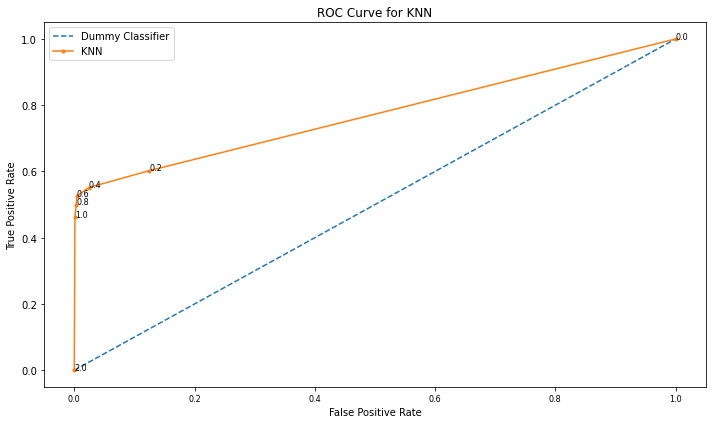

In [5130]:
# generate a dummy prediction - set all to 1, probability of 1 always implies positive class 
ns_probs = [1 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
knn_auc = roc_auc_score(y_test, knnModel.predict_proba(knnTestData)[:,1])

# summarize scores
print('Dummy: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knnModel.predict_proba(knnTestData)[:,1])

plt.figure(figsize=(10, 6))

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifier')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

plt.title("ROC Curve for KNN")

# plot the thresholds
for i, txt in enumerate(list(thresholds)):
    plt.annotate(txt, (knn_fpr[i], knn_tpr[i]), size=8)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

We can double check that this is the same as using the plot_roc_curve function:

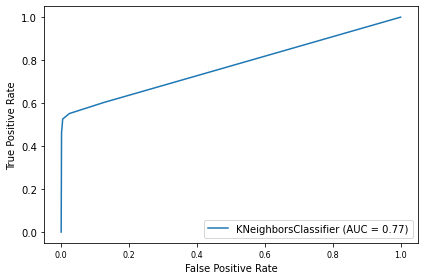

In [5219]:
plot_roc_curve(knnModel, knnTestData, y_test)

From the above graphs we can see that the KNN classifier is better at classifying than the dummy classifier, and has an AUC of 0.77

__DTC__

Dummy: ROC AUC=0.500
DTC: ROC AUC=0.798


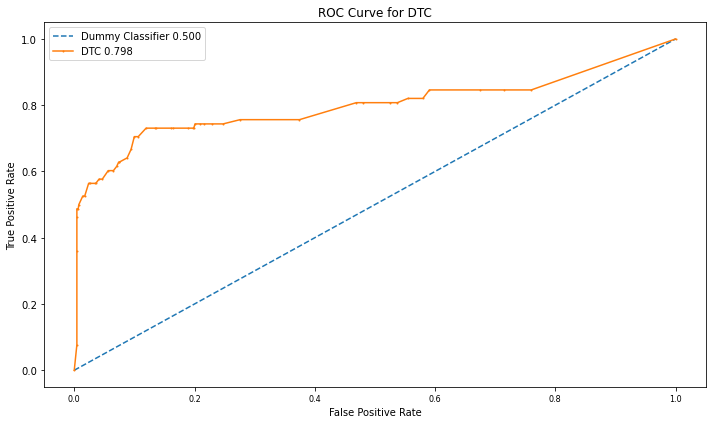

In [5220]:
# generate a dummy prediction - set all to 1, probability of 1 always implies positive class 
ns_probs = [1 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dtc_auc = roc_auc_score(y_test, dtcModel.predict_proba(dtcTestData)[:,1])

# summarize scores
print('Dummy: ROC AUC=%.3f' % (ns_auc))
print('DTC: ROC AUC=%.3f' % (dtc_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dtc_fpr, dtc_tpr, thresholds = roc_curve(y_test, dtcModel.predict_proba(dtcTestData)[:,1])

plt.figure(figsize=(10, 6))

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifier %.3f' % (ns_auc))
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='DTC %.3f' % (dtc_auc), markersize=2)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

plt.title("ROC Curve for DTC")

# plot the thresholds
# for i, txt in enumerate(list(thresholds)):
#     plt.annotate(txt, (dtc_fpr[i], dtc_tpr[i]), size=8)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

From the above graph we can see that the DTC classifier is better at classifying than the dummy classifier, and has an AUC of 0.798.

There are a lot more points on our graph for the ROC cure for DTC than KNN. This is simply because there are more distinct probabilities for DTC than KNN, as the number of points and number of distict probabilities are related:

In [5221]:
len(np.unique(knnModel.predict_proba(knnTestData)[:,1]))

6

In [5222]:
len(np.unique(dtcModel.predict_proba(dtcTestData)[:,1]))

50

__SVC__

No Skill: ROC AUC=0.500
SVC: ROC AUC=0.788


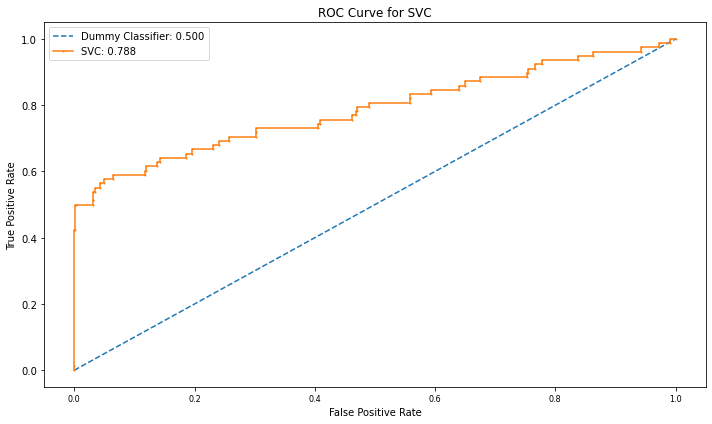

In [5223]:
# generate a dummy prediction - set all to 1, probability of 1 always implies positive class 
ns_probs = [1 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
svc_auc = roc_auc_score(y_test, svcModel.predict_proba(svcTestData)[:,1])

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVC: ROC AUC=%.3f' % (svc_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svc_fpr, svc_tpr, thresholds = roc_curve(y_test, svcModel.predict_proba(svcTestData)[:,1])

plt.figure(figsize=(10, 6))

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifier: %.3f' % (ns_auc))
pyplot.plot(svc_fpr, svc_tpr, marker='.', label='SVC: %.3f' % (svc_auc), markersize=2)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

plt.title("ROC Curve for SVC")

# plot the thresholds
# for i, txt in enumerate(list(thresholds)):
#     plt.annotate(txt, (dtc_fpr[i], dtc_tpr[i]), size=8)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

From the above graph we can see that the SVC classifier is better at classifying than the dummy classifier, and has an AUC of 0.788.

__NB__

No Skill: ROC AUC=0.500
NB: ROC AUC=0.816


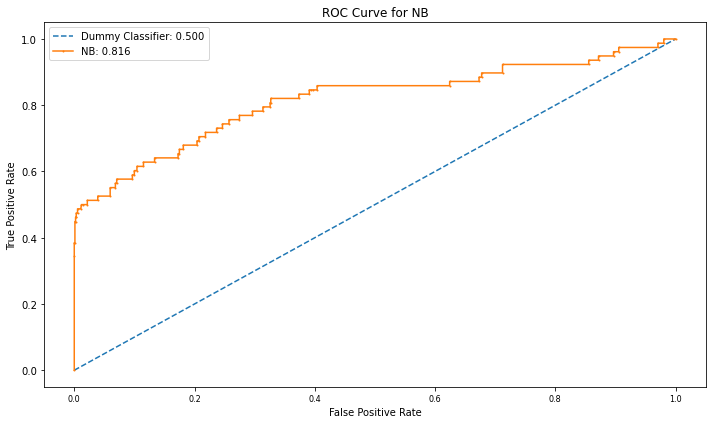

In [5121]:
# generate a dummy prediction - set all to 1, probability of 1 always implies positive class 
ns_probs = [1 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nbModel.predict_proba(nbTestData)[:,1])

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('NB: ROC AUC=%.3f' % (nb_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, nbModel.predict_proba(nbTestData)[:,1])

plt.figure(figsize=(10, 6))

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifier: %.3f' % (ns_auc))
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='NB: %.3f' % (nb_auc), markersize=2)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

plt.title("ROC Curve for NB")

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

From the above graph we can see that the NB classifier is better at classifying than the dummy classifier, and has an AUC of 0.816.

We can now plot each of the curves together and compare:

Dummy: ROC AUC=0.500
KNN: ROC AUC=0.772
DTC: ROC AUC=0.798
SVC: ROC AUC=0.788
NB: ROC AUC=0.816


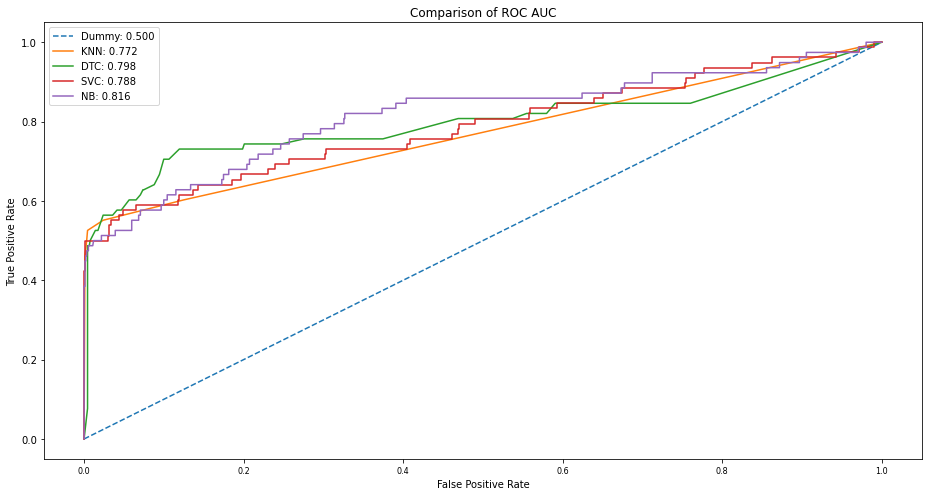

In [5123]:
# summarize scores
print('Dummy: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('DTC: ROC AUC=%.3f' % (dtc_auc))
print('SVC: ROC AUC=%.3f' % (svc_auc))
print('NB: ROC AUC=%.3f' % (nb_auc))

plt.figure(figsize=(13, 7))

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy: %.3f'%(ns_auc))
pyplot.plot(knn_fpr, knn_tpr, label='KNN: %.3f'%(knn_auc))
pyplot.plot(dtc_fpr, dtc_tpr, label='DTC: %.3f' % (dtc_auc))
pyplot.plot(svc_fpr, svc_tpr, label='SVC: %.3f' % (svc_auc))
pyplot.plot(nb_fpr, nb_tpr, label='NB: %.3f'% (nb_auc))

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

plt.title("Comparison of ROC AUC")

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

NB has the highest AUC of 0.816, followed by DTC with 0.798, DTC with 0.788, and KNN with 0.772.

#### Summary

| Classifier Type |  F Measure | BAR | AUC |
|---------|---------|--------|---|
|KNN  |0.422 | 0.761 | 0.772 |
| DTC  | 0.38 | 0.74 | 0.798 |
| SVC | 0.41 | 0.748 | 0.788 | 
| NB | 0.343 | 0.74| 0.816 |

The table above summaries there different metrics I used to evaluated the classifiers. I must now compare and decide which classifier best suits the data, and would be best for the animal shelter to use.

KNN has the highest F measure and BAR, but the lowest AUC.

NB has the lowest F measure and BAR, but the highest AUC.

DTC has the 3rd highest F measure, 2nd highest BAR, and 2nd highest AUC.

SVC has the 2nd highest F measure, 2nd highest BAR, and 3rd highest AUC.

The AUC is based on true positive rate and false positive rate. This is similar to precision which is TP / (TP + FP). I discussed in great detail earlier precision vs recall, and decided to favour recall as the consequences of a false negative far outweigh the consequences of a false positive. I took this into account by choosing B>1 in my F-Measure. Because of this, I will also favour F Measure > AUC now, as AUC does not take false negative rate into account. 

Because of this, I think that the KNN classifier is the best. It has the highest F measure and BAR, and although it has the lowest AUC, this does not take false negative rate into account, which I am trying to minimise.

__Is the accuracy higher or lower for the reduced dataset compared to the full dataset?__

We can train and test our classifiers (with the same parameters used for the final of each classifier which we just evaluated) using our full training and test sets containing all features, and compare to the results we got using the reduced feature sets generated for each classifier using SFS:

In [5214]:
knnModelFullFeatureSet = KNeighborsClassifier()
knnModelFullFeatureSet.fit(X_train, y_train)
y_predictionsFullFeatureSet = knnModelFullFeatureSet.predict(X_test)
knnMetricsFullFeatureSet = confusionMatrixMetrics(y_test, y_predictionsFullFeatureSet, p=True)

F Measure : 0.392
BAR : 0.753
BER : 0.247


In [5216]:
dtcModelFullFeatureSet = DecisionTreeClassifier()
dtcModelFullFeatureSet.fit(X_train, y_train)
y_predictionsFullFeatureSet = dtcModelFullFeatureSet.predict(X_test)
dtcMetricsFullFeatureSet = confusionMatrixMetrics(y_test, y_predictionsFullFeatureSet, p=True)

F Measure : 0.3
BAR : 0.763
BER : 0.237


In [5217]:
svcModelFullFeatureSet = SVC(C=1, kernel='rbf')
svcModelFullFeatureSet.fit(X_train, y_train)
y_predictionsFullFeatureSet = svcModelFullFeatureSet.predict(X_test)
svcMetricsFullFeatureSet = confusionMatrixMetrics(y_test, y_predictionsFullFeatureSet, p=True)

F Measure : 0.41
BAR : 0.748
BER : 0.252


In [5218]:
nbModelFullFeatureSet = GaussianNB()
nbModelFullFeatureSet.fit(X_train, y_train)
y_predictionsFullFeatureSet = nbModelFullFeatureSet.predict(X_test)
nbMetricsFullFeatureSet = confusionMatrixMetrics(y_test, y_predictionsFullFeatureSet, p=True)

F Measure : 0.084
BAR : 0.568
BER : 0.432


<center>KNN:</center>

|Feature Set | F Measure | BAR | 
| --- | --- | --- |
| Full | 0.392 | 0.753 |
| Reduced | 0.422 | 0.761 |

<center>DTC:</center>

|Feature Set | F Measure | BAR | 
| --- | --- | --- |
| Full | 0.3 | 0.763 |
| Reduced | 0.38 | 0.74 |

<center>SVC:</center>

|Feature Set | F Measure | BAR | 
| --- | --- | --- |
| Full | 0.41 | 0.748 |
| Reduced | 0.41 | 0.748 |

<center>NB:</center>

|Feature Set | F Measure | BAR | 
| --- | --- | --- |
| Full | 0.084 | 0.568 |
| Reduced | 0.343 | 0.74 |



For KNN our balanced accuracy and F measure are both better for the reduced feature set. 


For DTC the F measure is very slightly higher for the reduced feature set, but the BAR is lower.

For SVC the F and BAR are the same for reduced and full.

For NB the reduced feature set has a much higher F and measure.

The results for KNN and NB are expected and in line with what we learned in class (e.g. curse of dimensionality).

However I am surprised about the performanced being worse for DTC, and the same for SVC. It is possibly due to the feature subset selected by SFS being too tuned to the training data and picked up a lot of noise which is representative of the population, which led to overfittin. Thus the model does not generalise very well and performs worse than using all features.

I was also surprised at the lack of improvement that parameter tuning had. For each classifier I tried various different combinations of parameter tuning, and for KNN, DTC and NB the best results were when I didn't use any parameters at all. I am surprised by this and it is not in line with what I learned in class / through research about how hyperparameter tuning can improve your model, I applied k-fold cross validation to avoid overfitting my parameters, and I used a stratified split so that by training and test data would be evenly balanced, so I am surprised by this. I also used both balanced accuracy and R Measure when tuning my parameters, creating custom scoring functions for these metrics and passing these into my grid search cross validation functions, and I didn't see an imrpovement in either using the parameters.

Overall I also don't think the performance of any of the classifiers is as good as one would hope. The highest balanced accuracy for example is 0.761 for KNN. The model only predicts the correct class 76% of the time. Perhaps there were too many noisy features in the dataset which cause overfitting. I tried to prevent overfitting by splitting the training data further into test and training data at the very beginning, performing feature selection on the training split of the training data only, doing parameter tuning using again only on the trainng split, woth a 3-way hold out strategy and k-fold cross validation so that our evaluation isn’t dependent on how the data is split. 

Perhaps I had too many features, despite using a SFS wrapper technique. The KNN and SVM classifier used the most features, and the DTC and NB classifiers used a lot moss as seen below. We saw that the DTC and NB has larger AUC values, and perhaps this is due to less features, meaning less noise and overfitting, which leads to higher accuracy.

In [5225]:
len(features_knn)

65

In [5226]:
len(features_dtc)

11

In [5228]:
len(features_svm)

58

In [5229]:
len(features_nbc)

22

### <font color='steelblue'>Question 2</font>
#### <font color='steelblue'>(a) Consider the nightmare situation in which you struggled hard to obtain a very high accuracy (>95%) on your training data for a binary classiﬁcation task, but when your client ran it on their test data, the accuracy was very low (<50%). This is despite the fact that your dataset is reasonably balanced (majority class < 65%) and you are using a fairly complex learning algorithms with many parameters to ﬁt your dataset.</font>

Potential problem: 
Overfitting caused by not enough trainining data & overly complex model, high accuracy on training data due to peeking.

The issue occuring in this situation is known as overfitting. __Overfitting__ is when the model is fitted to closely to the training data and cannot generalise to situations not present during thr training data. This can lead to very high accuracy for training data, but very low accuracy for unseen data, i.e. low generalisation accuracy. 

The question has not mentioned the amount of data. It is possible that the cause of overfitting comes down to the fact that the amount of training data is low, and the model is too complex for the amount of data.

__Insufficient data__ is a common struggle in real world machine learning tasks. This is because the data in question is often confidential, for example healthcare patient’s or credit card company customer’s data, and such we are only provided with a common and small amount of data to make future predictions.

If the classifier is only given a small set of training examples, it is possible that these examples are __not representative of the underlying concepts and not representative of the population__. In order to generalize the model well, it is crucial that the training data be an accurate representation of the population. If the sample is too small, you will have sampling __noise__, which is the nonrepresentative data as a result of chance. This is known as sampling bias - when a dataset does not reflect the realities of the environment in which a model will run. 

Another major problem with insufficient data lies in the fact that with less data, __variance__ increases. Variance, which can be defined as the variability of model prediction for a given data point or a value, tells us how the data is spread. High variability in models, means that the model will fit the training data perfectly, but will perform very poorly for unseen data.

When we discuss model prediction, it’s important to understand the __tradeoff between the prediction errors bias and variance__. Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. A low bias prediction error is when our model pays a lot of attention to our training data, including noise, and builds an overly complex model. Variance, as mentioned above, is the variability of model prediction for a given data point. A model with high variance pays a lot of attention to training data and does not generalize well for unseen data.

__Low bias and high variance leads to overfitting__. Such models are overly complex.

If our model is too simple and has very few parameters then it may have high bias and low variance which can lead to underfitting. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias which can lead to overfitting. Thus there is a tradeoff in complexity between bias and variance. 

I have mentioned that the model may be too complex, but what do we mean by this? A model that is too complex may have __too many parameters/features relative to the number of training examples__. We know that the model in question is complex with many parameters as it is state in the question. If we have more features than observations we run the risk of massively overfitting our model. In practice, to build a good model, the __number of examples required per feature increases exponentially with number of features__. This pheonomenon of performance decreasing if we have too many features is known as the __curse of dimensionality__ and I will discuss this in greater detail in a later question.

So far we have identified that overfitting has occurred as the model is overly complex, and there may have been insufficient tranining data. This means that model may have picked up all of the noise – spurious/contradictory patterns – from the training data that does not occur in the test data  (-> overly complex, high dimensionality), and that the training data may not be representative of the population and may have high variance (-> not enough training data).

The model obtain a very high accuracy for the test data. Its is possible for this type of problem to occur but the be tested properly so that we do not obtain a high accuracy on the test data, which will help us to identify the problem before we send the model off to the client. __Peeking__ is when the performance of a model is evaluated using the same data used to train it, it is clear that this occurred here, and we aim to avoid this. Firstly, I recommend splitting the training data further into test and training data at the very beginning. The test data should then not be touched at all during normalisation, feature selection, parameter tuning etc. Any feature normalisation or filling in of missing data for the training and test splits of the training data should be done using stats from the training split of the training data. Feature selection should be done on the training split of the training data only. For parameter tuning, one could apply a 3-way hold out strategy, where our training split of the training data is further split into training R, validation V, and test T, and then the model parameters are tuned on V, trained on R and V and tested on T. This could be coupled with a cross validation strategy such as k-fold cross validation so that our evaluation isn’t dependent on how the data is split. Finally, when our parameters are tuned and model is complete, we can test the model on the completely unseen test data that we set aside at the beginning. This way if we have overfit our model we should get a low accuracy score for this unseen test data.

Once the issue is identified it can then be overcome by reducing the model complexity.

#### <font color='steelblue'>(b) Explain (in own words) what is the kernel trick in SVM? What is the mathematical reasoning that makes it work? Why is the kernel trick important? Give some examples of the kernels together with the situation when you should use it. [10 marks]</font>

Support vector classification is based on the idea of classifying data which can be seperated by a line or boundary by what side of the boundary the data lies on. The objective of the support vector machine algorithm is to __find a hyperplane in an N-dimensional space that distinctly classifies the data points, and which has the maximum margin__, i.e the maximum distance between data points of both classes.  The closest pair of data points from each class are known as the support vectors, and we want to maximise the margin, i.e. the distance between these support vectors from each class. Due to the fact that we are trying to maximise the margin this is an optimisation problem. We train the SVM to find this maximum margin which optimally seperates the two classes.

Support vector classification relies on this notion of linearly separable data, but in practice we do not always have data that is linearly seperable. __If the data is not linearly seperable, we need to apply transformations to map the data to a higher dimensional (n-dimensional) feature space in which it is linearly seperable__ (seperable with an n-dimensional hyperplane).

There can be many transformations that allow the data to be linearly separated in higher dimensions. Once we transform our data to a higher dimension in which it is linearly seperable, we then need to __train our SVM to optimise the objective function__ and find the optimal hyperplane to seperate the data. This __involves performing operations in the higher dimensional transformed feature speace, which can be very computationally expensive__ in practice.

The solution to this problem is __<font color='steelblue'>the kernel trick</font>__. The trick is that __kernel methods represent the data only through a set of pairwise similarity comparisons__ (dot products) between the original data observations x __in the original feature space__, instead of explicitly applying the transformations ϕ(x) and representing the data in the higher dimensional feature space.

With the kernel functions we __compute the dot product in the original space and raising the result (a scalar) to a power__, and this is __exactly same as the dot product in a higher dimensional space__. A kernel function takes as input vectors in the original space. It __returns the dot product of the vectors in the higher dimensional feature space__.

We can formally define kernel functions as follows:

For x, z ∈ X, and ϕ : X -> RN, kernel Function, k: 
__k(x, z) = < ϕ (x), ϕ (z)>__

(where  <> indicated dot product)

The reason that the kernel function is equal to the dot product of the transformed vectors is because __each coordinate of the transformed vector ϕ(x) is just some function of the coordinates in the corresponding lower dimensional vector x__.

The __main benefit__ of this kernel trick becomes clear when we __understand the objective function__ which we are trying to optimise.

Objective Function - Why the Kernel Trick is so important:

The function of a hyperplane is 

y = b + w1x1 + w2x2 + … + wxxm= b + wTX

If we assume three hyperplanes, Π +, Π -, Π, such that ‘Π +’ is parallel to ‘Π’ passing through the support vectors on the positive side and ‘Π −’ is parallel to ‘Π’ passing through the support vectors on the negative side.

The equations of these hyperplanes are:

Π = b + wTX = 0
Π+ = b + wTX = 1
Π- = b + wTX = -1.

So for a given vector x1 which has classification y1=1, we want y1(b + wTX) = 1(b + wTX) >=1, 
i.e. y1(b + wTX) -1 >= 0  

and for vector x1 which has classification y1=-1,  we want 
y1(b + wTX) = -1(b + wTX) >=1, 
i.e. y1(b + wTX) -1 >= 0  

For a support vector x we want 
y1(b + wTX) -1 = 0. 

If we have two support vectors, x + and x -, which by definition lie on the margin boundary, then we can compute the dot product of these and project this onto w, which we know is orthogonal to our hyperplane, and this will give us the width of the margin.

The width of the margin is therefore equal to 
width = (x + - x - ).(w / ||w||)
where x+ and x- are support vectors which are classified as positive and negative respectively, and ||w|| is the magnitude of our vector w. Calculating the dot product  and subbing in the formulae from above we get
width 
= (x +w – x -w) / ||w|| 
= ( (b + 1) – (-b - 1) ) / ||w||
= 2 / ||w||

So, we want to maximise the margin, i.e. maximise 2/||w|| under the constraints. We can drop the constant 2 and maximise 1/||w||, which is also the same as minimising ||w||. This is also the same as minimising ||w||2 / 2. We multiply by ½ and square as it is mathematically convenient.

So our __objective function is to minimise ||w||2 / 2__.

Now that we understand what the objective function is, where does the kernel trick come into the equation?

Now, we can assume that w lies in the same plane as the training examples x1, x2, …, xn. We can take a projecion of w into the plane formed by vectors x1, x2, …, xn. We __can therefore write w as a convext combination of the training examples x1, x2, …, xn which only depends on the dot products__. We __don't need to know x1, x2, …xn as long as we know the dot products__, so we can replace xi by a very high dimensional feature vector as long as we can compute the dot products easily.

So how does this relate back to our kernel trick? __<font color='steelblue'>The ultimate benefit of the kernel trick is that the objective function we are optimizing to fit the higher dimensional decision boundary only includes the dot product of the transformed feature vectors as explained above. Therefore, we can just substitute these dot product terms with the kernel function.</font>__

So, as mentioned previously, our data is only linearly separable as the vectors ϕ(x) in the higher dimensional space, and using the kernel trick we are __finding the optimal separating hyperplane in this higher dimensional space without having to calculate ϕ(x)__.

__Examples of kernels and when to use:__

Linear Kernel:

The linear kernel is the most basic type of kernel, it is usually one-dimensional, and is typically best when there re a lot of features. It is faster than a lot of other kernel functions. A common application of the linear kernel is for text-classification problems. An example is k(xi, xj) = sum(xi.xj)

Polynomial Kernel:

The polynomial kernel is a more generalised representation of the linear kernel. It is not a popular as many other kernel functions as it is less accurate and less efficient. It is often used for image processing. An example is k(xi, xj) = (xi.xj+1)d for some d. For example, (xi.xj+1)2.

Gaussian Radial Basis Function (RBF) :

Gaussian Radial Basis Function (RBF) is one of the most preferred and used kernel functions in SVM. It is usually chosen for non-linear data. It helps to make proper separation when there is no prior knowledge of data.
An example is k(xi, xj) = exp(-gamma * ||xi - xj||^2)
Where thee parameter gamma varies from 0 to 1. The most preferred value for gamma is 0.1.

Sigmoid Kernel:

The sigmoid kernel is the most preferred kernel for neural networks. An example is k(xi, xj) = tanh(αxay + c)

ANOVA Kernel:

The ANOVA kernel is popular in multidimensional regression problems.

__<font color='steelblue'>(c) Explain,  in  your  own  words,  what  is  the  curse  of  dimensionality?  Give  a mathematical intuition as to why a k-nearest neighbour classiﬁer may struggle on a very high-dimensional data. Give examples of various situations in which you would want to reduce the number of features you consider for classiﬁcation. [10 marks]</font>__


The __Curse of Demonsonality__ refers to the idea of machine learning algorithms __performing poorly on high-dimensional data__, i.e. data with a very large number of features. Usually, in practice, if we start with 1 feature and gradually add more, the additional features are adding more information so our model should perform better. However, we will reach a point where we have the optimal number of features added, and adding more features no longer helps and may even worsen performance, i.e. cause less accuracte predictions.

If we have __more features than observations__ then we run the risk of massively __overfitting__ our model, which would generally result in very poor classification of unseen data. In practice, to build a good model, the __number of examples required per feature increases exponentially with number of features__.

Furthermore, when we have too many features, observations become __harder to cluster__. Having very high dimensions can cause every observation in your dataset to appear equidistant from all the others. Because clustering uses a distance measure such as Euclidean distance to quantify the similarity between observations, this can be a big problem. If the distances are all approximately equal, then all the observations appear equally alike / equally different, and no meaningful clusters can be formed. This leads on to the second part of the question, which is why k-nearest neighbour classifiers may struggle with very high-dimensional data.

That __k-nearset neighbours__ algorithm makes classification predictions about the data points based on the assumption that nearby data points are similar. The special challenge with k-nearest neighbors is that it __requires points to be close in every single dimension__ for them to be seen as similar, even if some of these dimensions are just noise. It needs all points to be close along every axis in the data space. Therefore each new axis added with the addition of a new dimension makes it harder and harder for two specific points to be close to each other in every axis.

Mathematically, the problem comes down to the fact that as we __increase the number of dimensions__, the average distance between points increases, and more importantly the __ratio of the closest distance to the average distance approaches 1, thus decreasing the predictive power__. In low-dimensional data sets, the closest points tend to be much closer than average. __In higher dimensions, often the closest points aren’t much closer than the average__. If the nearest point is almost as far away as the average point, then it has only slightly more predictive power than the average point, so two points being close together doesn’t mean much.

When to reduce the number of features:
-	When we have a small number of examples. In general, the number of examples required per feature increases exponentially with number of features, so if we don’t have a very large number of examples it is wise to reduce the number of features.
-	When we have a number of very noisy and irrelevant features
-	When we have features with values that are not representative of the population we will be using the model for. For example, training a model for future predictions using historical data, with features such as “Date”. The date will never be the same in the futures as it was in the past. Including this could lead to higher accuracy scores on the test data than we will have in reality because we have overfit the model by including this.
-	A large amount of features can also cause very high computational costs, such as running time and memory usage. If this is an issue then the number of features should be reduced
-	For certain tasks, such as classification problems in the medical field, running experiments to generate features may have a high financial costs, so it may be wise to reduce the number of features we want to generate
-	Finally, if we have too many features it can be very difficult to understand the underlying process that generates the results. Feature reduction will make the model a lot more interpretable. This may give clients more trust in the model as they can understand and interpret it more easily.

__Is the accuracy higher or lower for the reduced dataset compared to the full dataset?__

We can train and test our classifiers (with the same parameters used for the final of each classifier which we just evaluated) using our full training and test sets containing all features, and compare to the results we got using the reduced feature sets generated for each classifier using SFS:

__<font color='steelblue'> (d) You are working on a classiﬁcation task to separate fraudulent transactions from the normal  ﬁnancial  transactions.  What  evaluation  measure(s)  will  you  use  for  this application and why? What measure will you not use for this application and why? [10 marks]</font>__

The data for classification tasks to separate fraudulent transactions from the normal  ﬁnancial  transactions is typically very __unbalanced__. The majority of transactions are normal financial transactions, and a very small percentage of the transactions will be fradulent. Because of this, __accuracy is not a useful evaluation measure__. This is because if, for example, 99% of transactions were normal and 1% were fradulent, if we had a model that simply predicted that the transaction was normal for every example, then the model would return 99% accuracy which is typically excellent for binary classification predictors, but is not the case here as none of the fradulent trasactions have been detected. 

To understand which evaluation measures are most suitable we must first understand the penalties of mislabelling the transactions. The __penalty for mislabeling a fraudulent transaction as legitimate (false negative)__ is having a user’s money stolen. The __penalty for mislabeling a legitimate transaction as fraudulent (false positive)__ is having the users account frozen so they are unable to make payments. There are therefore serious penalties for both types of mislabelling. False positives, where the user’s money is stolen, will lead to the credit card company likely having to reimburse the customer, and false negatives could lead to very unhappy customers as they cannot make payments, and this may in turn lead to the customers deciding to move to a different credit card provider. Therefore there are very serious consequences for both. There is a very fine tradeoff between these two consequence. To understand this we must understand the trade off between precision and recall.

__Precision and recall__ are more suitable metrics to use in this type of inbalanced classification problem.

Precision is the proportion of retrieved results that are relevant. It is calculated as the rate of true positives divided by the sum of true positives and false positives. In the context of the question, it is the proportion of transactions which were classified by the model as fradulent that were actually fradulent. Precision should be favoured when the penalty of incorrectly classifying a legitimate transaction as fradulent is very serious, but we don’t mind some fradulent transactions being incorrectly classified as legitimate.

Recall, also known as the sensitivity, is the proportion of relevant results that are retrieved. In the context of the question, this is the proportion of all fradulent transactions that were actually classified as fradulent. Recall should be favoured when the penalty of incorrectly classfying fradulent transactions as legimate is very serious, but we don’t mind some legitimate transactions being classified as fradulent.

I recommend that you use recall when it’s absolutely critical you identify every single fraudulent transaction and you feel okay with incorrectly classifying some non-fraudulent transactions as fraudulent.

The __F-Measure__ is a single measure that trades off precision against recall. It is calculated as (1 + B^2)(Precision)(Recall) / (B^2)(Precision + Recall). The B parameter controls the trade-off. B<1 focuses on precision, B>1 focuses on recall, and B=1 treats both precision and recall equally, known as the harmonic mean.

__In my opinion, the penalty for incorrectly classifying a fradulent transaction as legitimate is more serious than the penalty for incorrectly classifying a legitimate transaction as fradulent__. I think customers would be more unhappy about their money being stolen than by the inconvenience of being temporarily locked out of their account, and in the case of a fradulent transaction it is likely that the credit card company would have to reinburse the customer. __Thus I would advise more weight be placed on recall than precision__, for example using the F Measure with B=1.5. However, it would really depend on what the credit card company would consider to be a more serious penalty.